# Build ML models - for mostly full 7 KBps window

Compare results of training on 70% vs. 99.5% mC called data

In [1]:
# !  python3 -m pip install tensorflow
# !  python3 -m pip install keras
# ! python3 -m pip install 'scikit-learn'
# ! python3 -m pip install shap

In [1]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import time

import sklearn

import shap


In [2]:
# From /home/michalula/code/epiCausality/epiCode/PIPELINE_extract_plot_mCG_strands_profiles_bigger_window.ipynb
# CGs_all saved as CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy in dimelo_v2_output
# Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)

In [3]:
CGs_all_silenced = np.load("/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD659_numRVS1149.npy")
    # "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD652_numRVS1125.npy")
    
    # "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day28_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD5_numRVS6.npy")
    # "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_silenced_T_primerES_nCATS_numFWD5860_numRVS4229_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")

# 142 CpG units: - 7KBps region:
# Theshold 0.9 =  /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_silenced_T_primerES_nCATS_numFWD5860_numRVS4229_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy

# 106 CpG units:
# Theshold 0.7 = # (
# Theshold 0.9 =   /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_106_units_combined_silenced_T_primerES_nCATS_numFWD5306_numRVS3749_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy

# 16 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_silenced_T_primerES_nCATS_numFWD4723_numRVS3383_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")
# Theshold 0.9 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_silenced_T_primerES_nCATS_numFWD4511_numRVS3269_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")

# 12 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_silenced_T_primerES_nCATS_numFWD4478_numRVS3217_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
# Threshold 0.9 =(("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_silenced_T_primerES_nCATS_numFWD4220_numRVS3073_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
#
# ('/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')
# Silenced T cells nCATS:
# Threshold 0.7 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD4132_numRVS2965_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# # Threshold 0.9 =( '/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')

CGs_all_silenced, CGs_all_silenced.shape

(array([[ 1.,  1., nan, ...,  1., nan,  1.],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan,  1., nan],
        ...,
        [ 1.,  1., nan, ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan,  1., nan]]),
 (1808, 137))

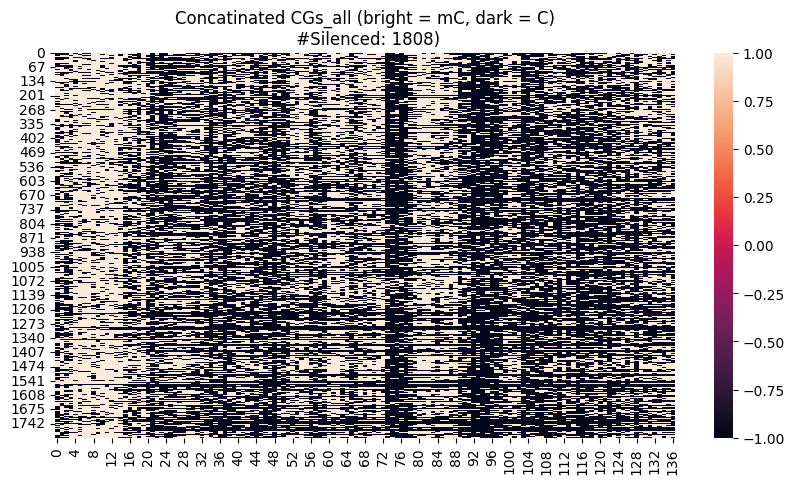

In [4]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()


In [5]:
CGs_all_silenced_full = CGs_all_silenced.copy()
CGs_all_silenced_full, CGs_all_silenced_full.shape

(array([[ 1.,  1., nan, ...,  1., nan,  1.],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan,  1., nan],
        ...,
        [ 1.,  1., nan, ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan,  1., nan]]),
 (1808, 137))

In [6]:
# # plot X_unedited_silenced 
# Gs_all_silenced_cut = pd.DataFrame(CGs_all_silenced[:-1600])

# # Heatmap of CGs_all
# plt.figure(figsize=(10, 5))
# sns.heatmap(Gs_all_silenced_cut.fillna(-1))
# plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {Gs_all_silenced_cut.shape[0]})")
# plt.show()


In [7]:
# CGs_all_silenced = np.array(Gs_all_silenced_cut)
# CGs_all_silenced, CGs_all_silenced.shape

In [8]:
CGs_all_silenced, CGs_all_silenced.shape

(array([[ 1.,  1., nan, ...,  1., nan,  1.],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        [ 1., nan, nan, ..., nan,  1., nan],
        ...,
        [ 1.,  1., nan, ..., nan, nan, nan],
        [ 1.,  1.,  1., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan,  1., nan]]),
 (1808, 137))

# Unedited cells

In [9]:
CGs_all_unedited = np.load("/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_unedited_Tcells_Thr0.7_NoFullyUnmethylated_T2Tv2_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD358_numRVS501.npy")
    # "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD357_numRVS496.npy")
    
    # "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/unedited/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day28_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD6_numRVS16.npy")
    # "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_unedited_T_primerES_nCATS_numFWD1940_numRVS1599_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")

# 142 CpG units: - 7KBps region:
# Threshold 0.9 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_unedited_T_primerES_nCATS_numFWD1940_numRVS1599_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")


# 106 CpG units:
# Threshold 0.9 =  /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_106_units_combined_unedited_T_primerES_nCATS_numFWD1760_numRVS1398_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy

# 16 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_unedited_T_primerES_nCATS_numFWD1345_numRVS949_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")
# Threshold 0.9 =    "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_unedited_T_primerES_nCATS_numFWD1058_numRVS795_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")

# 12 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_unedited_T_primerES_nCATS_numFWD1180_numRVS746_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
# Threshold 0.9 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_unedited_T_primerES_nCATS_numFWD881_numRVS598_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")

# ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

# Unedited T cells nCATS:
# Threshold 0.7 =  ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD1081_numRVS662_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# Threshold 0.9 =("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

CGs_all_unedited, CGs_all_unedited.shape

(array([[ 1.,  1., nan, ...,  1., nan,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [nan,  1.,  1., ..., nan,  1., nan],
        [nan, nan, nan, ...,  1.,  1., nan],
        [nan, nan,  1., ...,  1., nan, nan]]),
 (859, 137))

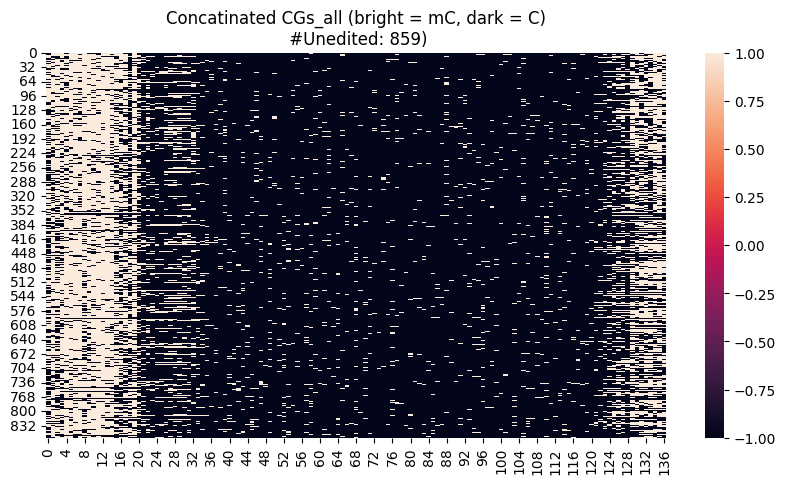

In [10]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_unedited).fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Unedited: {CGs_all_unedited.shape[0]})")
plt.show()


In [11]:
# # plot X_unedited_silenced 
# CGs_all_unedited_cut = pd.DataFrame(CGs_all_unedited[:-400])

# # Heatmap of CGs_all
# plt.figure(figsize=(10, 5))
# sns.heatmap(CGs_all_unedited_cut.fillna(-1))
# plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_unedited_cut.shape[0]})")
# plt.show()


# Keep same amount of reads per condition

In [12]:
# CGs_all_unedited = np.array(CGs_all_unedited_cut)
# CGs_all_unedited, CGs_all_unedited.shape

In [13]:
if CGs_all_silenced.shape[0] > CGs_all_unedited.shape[0]:
    print("Silenced has more reads than unedited")
    # Assuming CGs_all_silenced is your NumPy array of shape (6657, 10)
    num_rows = CGs_all_silenced.shape[0]  # Total number of rows
    subset_size = CGs_all_unedited.shape[0] # 1743 # 1304  # Define how many rows you want to randomly select
    print('subset_size = ', subset_size)

    # Randomly select row indices
    random_indices = np.random.choice(num_rows, subset_size, replace=False)

    # Get the subset
    subset = CGs_all_silenced[random_indices]

    # Display the shape to confirm
    print(subset.shape)  # Should be (subset_size, 10)

    CGs_all_silenced = subset
    CGs_all_silenced

else:
    print("Unedited has more reads than silenced")
    # Assuming CGs_all_silenced is your NumPy array of shape (6657, 10)
    num_rows = CGs_all_unedited.shape[0]  # Total number of rows
    subset_size = CGs_all_silenced.shape[0] # 1743 # 1304  # Define how many rows you want to randomly select
    print('subset_size = ', subset_size)

    # Randomly select row indices
    random_indices = np.random.choice(num_rows, subset_size, replace=False)

    # Get the subset
    subset = CGs_all_unedited[random_indices]

    # Display the shape to confirm
    print(subset.shape)  # Should be (subset_size, 10)

    CGs_all_unedited = subset
    CGs_all_unedited


print("Final shapes after balancing:")
print(CGs_all_silenced.shape[0], CGs_all_unedited.shape[0])

Silenced has more reads than unedited
subset_size =  859
(859, 137)
Final shapes after balancing:
859 859


In [14]:
CGs_all_silenced

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan,  1.,  1., ...,  1.,  1.,  1.],
       [nan,  1., nan, ..., nan, nan, nan],
       ...,
       [nan,  1., nan, ...,  1.,  1., nan],
       [ 1., nan,  1., ...,  1.,  1.,  1.],
       [nan, nan, nan, ..., nan, nan, nan]])

In [15]:
# Undetided T cells nCATS get lable 0 as CD55 is lowly expressed in silened T cells (~90% of cells should be silenced)
y_silenced = np.array([0] * CGs_all_silenced.shape[0])
y_silenced, y_silenced.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [16]:
# Undetided T cells nCATS get lable 1 as CD55 is highly expressed in undetided T cells
y_unedited = np.array([1] * CGs_all_unedited.shape[0])
y_unedited, y_unedited.shape

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [17]:
CGs_all_unedited.shape, CGs_all_silenced.shape

((859, 137), (859, 137))

In [18]:
X_unedited_silenced = np.concatenate((CGs_all_unedited, CGs_all_silenced), axis=0)
X_unedited_silenced, X_unedited_silenced.shape

(array([[ 1.,  1., nan, ...,  1., nan,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.],
        [nan,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [nan,  1., nan, ...,  1.,  1., nan],
        [ 1., nan,  1., ...,  1.,  1.,  1.],
        [nan, nan, nan, ..., nan, nan, nan]]),
 (1718, 137))

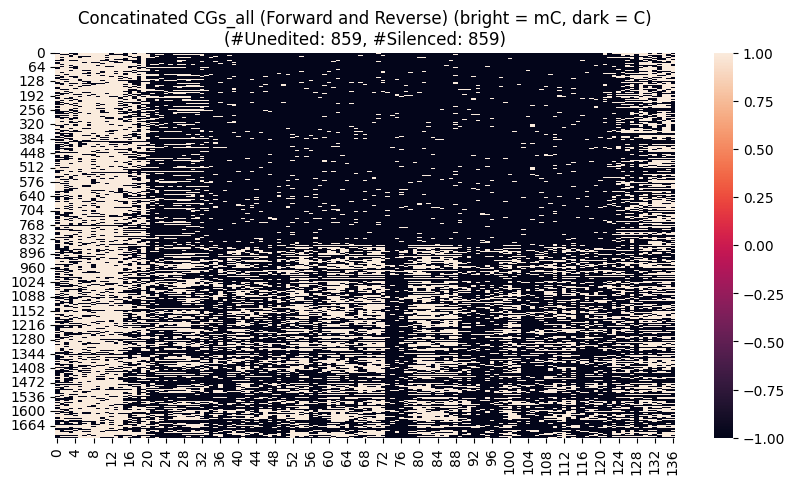

In [19]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(X_unedited_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (Forward and Reverse) (bright = mC, dark = C)\n(#Unedited: {CGs_all_unedited.shape[0]}, #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()


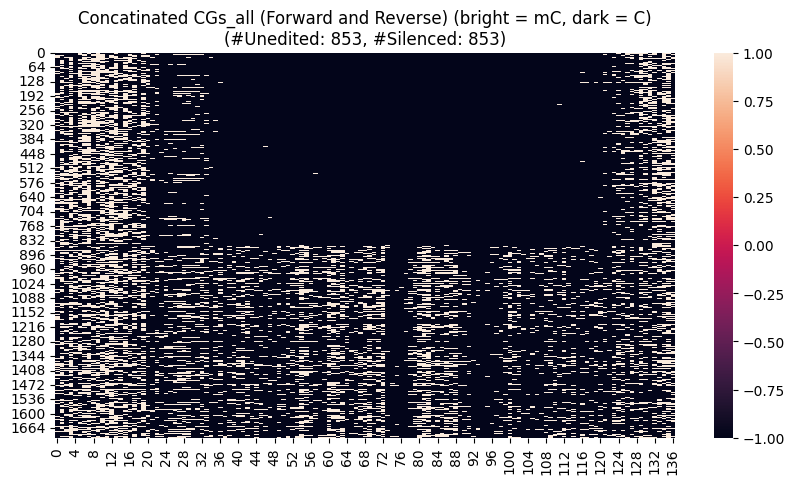

In [ ]:
# # plot X_unedited_silenced 

# # Heatmap of CGs_all
# plt.figure(figsize=(10, 5))
# sns.heatmap(pd.DataFrame(X_unedited_silenced).fillna(-1))
# plt.title(f"Concatinated CGs_all (Forward and Reverse) (bright = mC, dark = C)\n(#Unedited: {CGs_all_unedited.shape[0]}, #Silenced: {CGs_all_silenced.shape[0]})")
# plt.show()


In [20]:
y_unedited_silenced = np.concatenate((y_unedited, y_silenced), axis=0)
y_unedited_silenced, y_unedited_silenced.shape

(array([1, 1, 1, ..., 0, 0, 0]), (1718,))

In [21]:
train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16, shuffle=True)
train_idx, test_idx, len(train_idx), len(test_idx)

(array([1094,   61,  667, ...,  121, 1262,  681]),
 array([ 265,  304,  242,  306,  450, 1412,  865,  609,  378, 1417, 1313,
         991,  670, 1182, 1255, 1260,  624, 1606, 1046,  354, 1221,  964,
         782,  431,   38, 1543, 1661, 1142,  676,  392,  371, 1293,  702,
         729,  333,  560, 1544,   58,  679,  232, 1680,  658, 1588, 1304,
         580, 1183,  210, 1258,  480,  337,  840, 1650,  287,  973,  222,
         724,  732, 1407,  409, 1058,  429, 1275,  518,   43,  637,  615,
         981, 1662, 1194, 1151, 1679,  198, 1348,  501,  871,  654, 1031,
         135,  403, 1005,  884,  948, 1564, 1326,  571, 1235,  960,  330,
         990,  904,  289, 1689, 1020,  427,  254,  247,   55, 1337, 1624,
        1076, 1056, 1379,  972,  504,  221,  550, 1159,  597,  698,  292,
         996,  669,  120, 1426,  731,   25, 1032,  471,  537, 1316, 1537,
        1587, 1264,  360,  396, 1363,  520,  106,  524, 1509,  267, 1280,
        1256, 1331,  317,  817,  781, 1686,  644,   81, 1227,

In [22]:
X = pd.DataFrame(X_unedited_silenced).fillna(-1)
y = y_unedited_silenced

In [23]:
X.iloc[16:23,:]

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
16,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0
17,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
18,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
19,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0
20,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
21,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,...,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0
22,1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,...,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0


In [24]:
X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]

In [25]:
def predict_reg(f, X, y):
    preds = f.predict(X)
    preds_round = np.round(preds) # / 50) # 100-->2; 50-->1; 0-->0
    # print('preds=', preds[:16])
    # print('preds_round', preds_round[:16])
    # print('np.mean(preds_round==y)*100 =', np.mean(preds_round==y)*100)
    # print('y', y[:16])
    # preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    # print('preds012', preds012[:16])
    # print('np.mean(preds012*50==y)*100 =', np.mean(preds012*50==y)*100)
    return np.mean(preds_round==y)*100

model = LinearRegression().fit(X_train,y_train)
print("GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

print("####")
model = DecisionTreeRegressor().fit(X_train,y_train)
print("Tree: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = RandomForestRegressor().fit(X_train,y_train)
print("RF: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = GradientBoostingRegressor().fit(X_train,y_train)
print("GBM: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(50,20)).fit(X_train, y_train)
print("NN: {:.2f}%".format(predict_reg(model, X_test, y_test)))

print("####")
model = LogisticRegression(max_iter=1000, penalty="l1", solver='saga').fit(X_train,y_train)
print("Sparse GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

GLM: 91.63%
####
Tree: 88.84%
####
RF: 91.63%
####
GBM: 91.63%
####
NN: 89.07%
####
Sparse GLM: 92.09%


/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# def predict_reg(f, X, y):
#     preds = f.predict(X)
#     preds_round = np.round(preds) # / 50) # 100-->2; 50-->1; 0-->0
#     # print('preds=', preds[:16])
#     # print('preds_round', preds_round[:16])
#     # print('np.mean(preds_round==y)*100 =', np.mean(preds_round==y)*100)
#     # print('y', y[:16])
#     # preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
#     # print('preds012', preds012[:16])
#     # print('np.mean(preds012*50==y)*100 =', np.mean(preds012*50==y)*100)
#     return np.mean(preds_round==y)*100

# model = LinearRegression().fit(X_train,y_train)
# print("GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

# print("####")
# model = DecisionTreeRegressor().fit(X_train,y_train)
# print("Tree: {:.2f}%".format(predict_reg(model, X_test, y_test)))
# print("####")
# model = RandomForestRegressor().fit(X_train,y_train)
# print("RF: {:.2f}%".format(predict_reg(model, X_test, y_test)))
# print("####")
# model = GradientBoostingRegressor().fit(X_train,y_train)
# print("GBM: {:.2f}%".format(predict_reg(model, X_test, y_test)))
# print("####")
# model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(50,20)).fit(X_train, y_train)
# print("NN: {:.2f}%".format(predict_reg(model, X_test, y_test)))

# print("####")
# model = LogisticRegression(max_iter=1000, penalty="l1", solver='saga').fit(X_train,y_train)
# print("Sparse GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

GLM: 92.04%
####
Tree: 88.29%
####
RF: 93.21%
####
GBM: 94.61%
####
NN: 87.59%
####
Sparse GLM: 93.91%


/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [26]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_)), print(len(model.coef_[0]))

[[ 88  80  37  70 113  83 130 136  64  61  28 132 134  71  42  38  25  84
   81  19 135  97  41 137  43   3 102  77   9 131 123 106  73   4  20  69
  133  17  99  87  72   8  22  89 128   1  31 101  34  56  63  65  10   2
  114  27  24  46  16  55  14  94   6  12  21  33  51  18 125  13  11  60
   15 103 124   5  82  52  54  50  40  29   7  23  26  32  30  53  62  57
   58  59  44  45  47  48  96  95  93  92  90  91  86  85  67  66  68  74
  104 105 100  98 112 111 110 109 108 107 115 116  49  39  35  36  79  78
   75  76 127 126 122 121 117 118 119 120 129]]
[[2.17740932e-01 1.68314658e-01 4.15831421e-01 2.99817429e-01
  7.18557936e-03 1.17469663e-01 0.00000000e+00 2.39755429e-01
  3.98976097e-01 1.72163124e-01 6.05394405e-02 1.06137538e-01
  6.31625948e-02 1.26939213e-01 3.18105671e-02 1.27594631e-01
  2.77879347e-01 6.83025161e-02 4.69527800e-01 2.89541011e-01
  9.92105744e-02 2.35670592e-01 0.00000000e+00 1.42202010e-01
  5.30490639e-01 0.00000000e+00 1.58697597e-01 7.38580386e-01


(None, None)

In [27]:
celltypes = ["unedited", "silenced"]
celltypes

['unedited', 'silenced']

In [28]:
# model.coef_

In [29]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [30]:
(model.coef_).shape[1]

137

In [31]:
X_axis = np.arange(1, model.coef_.shape[1]+1)  # +1 # np.arange(10)+1
X_axis

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137])

In [32]:
np.abs(model.coef_)

array([[2.17740932e-01, 1.68314658e-01, 4.15831421e-01, 2.99817429e-01,
        7.18557936e-03, 1.17469663e-01, 0.00000000e+00, 2.39755429e-01,
        3.98976097e-01, 1.72163124e-01, 6.05394405e-02, 1.06137538e-01,
        6.31625948e-02, 1.26939213e-01, 3.18105671e-02, 1.27594631e-01,
        2.77879347e-01, 6.83025161e-02, 4.69527800e-01, 2.89541011e-01,
        9.92105744e-02, 2.35670592e-01, 0.00000000e+00, 1.42202010e-01,
        5.30490639e-01, 0.00000000e+00, 1.58697597e-01, 7.38580386e-01,
        0.00000000e+00, 0.00000000e+00, 2.07014970e-01, 0.00000000e+00,
        7.95429256e-02, 1.99671557e-01, 0.00000000e+00, 0.00000000e+00,
        1.39809637e+00, 5.40027241e-01, 0.00000000e+00, 0.00000000e+00,
        4.28869718e-01, 5.45943646e-01, 4.18460210e-01, 0.00000000e+00,
        0.00000000e+00, 1.37848641e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.87632415e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.27129805e-01, 1.885438

/tmp/ipykernel_1642994/1522961784.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


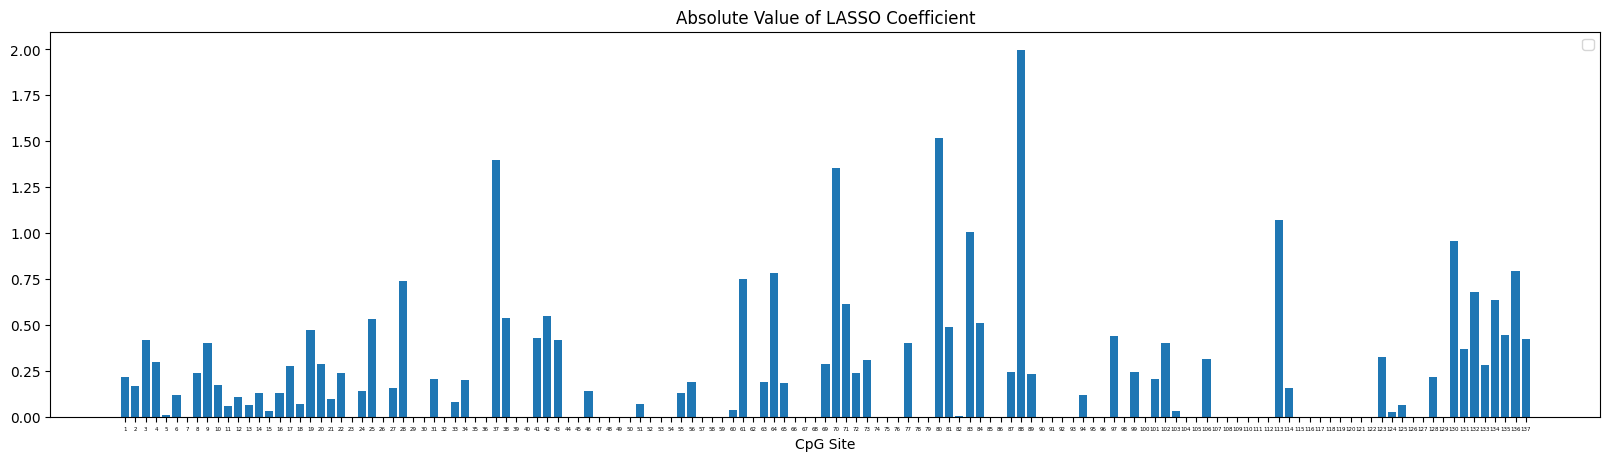

In [33]:
plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size

X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis, np.abs(model.coef_[0])) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=4)
plt.show()

/tmp/ipykernel_1641304/1522961784.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


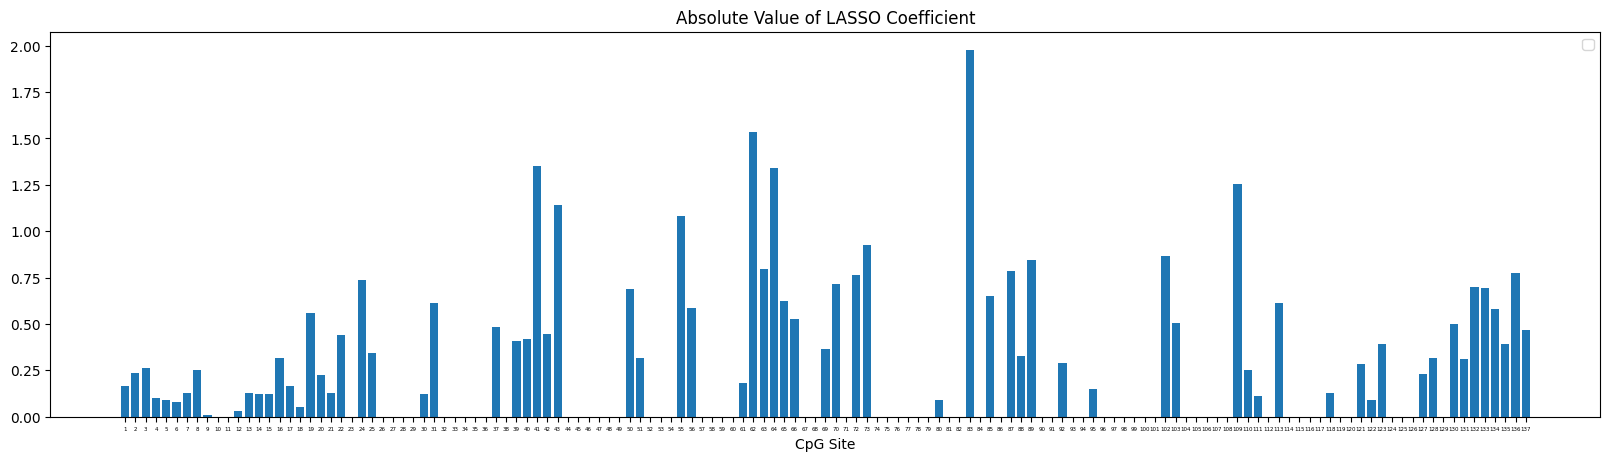

In [ ]:
# plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size

# X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
# shifts = [-.4,-.15] #,.1]

# # for i in range(1,2):
#     # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
# plt.bar(X_axis, np.abs(model.coef_[0])) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

# plt.legend()
# plt.title("Absolute Value of LASSO Coefficient")
# plt.xlabel("CpG Site")
# plt.xticks(X_axis)
# plt.xticks(X_axis, fontsize=4)
# plt.show()

In [34]:
def print_accuracy(f):
    print(f"Accuracy = {100 * np.sum(f(X_test) == y_test) / len(y_test)}%")
    time.sleep(0.5)  # to let the print get out before any progress bars


shap.initjs()

In [36]:
# # K-nearest neighbors
# knn = sklearn.neighbors.KNeighborsClassifier()
# knn.fit(X_train, y_train)

# print_accuracy(knn.predict)
# Accuracy = 96.66666666666667 # %
# # Explain a single prediction from the test set
# explainer = shap.KernelExplainer(knn.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test.iloc[0, :])
# shap.force_plot(explainer.expected_value[0], shap_values[:, 0], X_test.iloc[0, :])

# # Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
# # Explain all the predictions in the test set
# shap_values = explainer.shap_values(X_test)
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

# # sample order by similarity

# # f(x)
# # Support vector machine with a linear kernel
# svc_linear = sklearn.svm.SVC(kernel="linear", probability=True)
# svc_linear.fit(X_train, y_train)
# print_accuracy(svc_linear.predict)

# # explain all the predictions in the test set
# explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test)
# # this is multiclass so we only visualize the contributions to first class (hence index 0)
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

Text(0.5, 1.0, 'Global SHAP Importances')

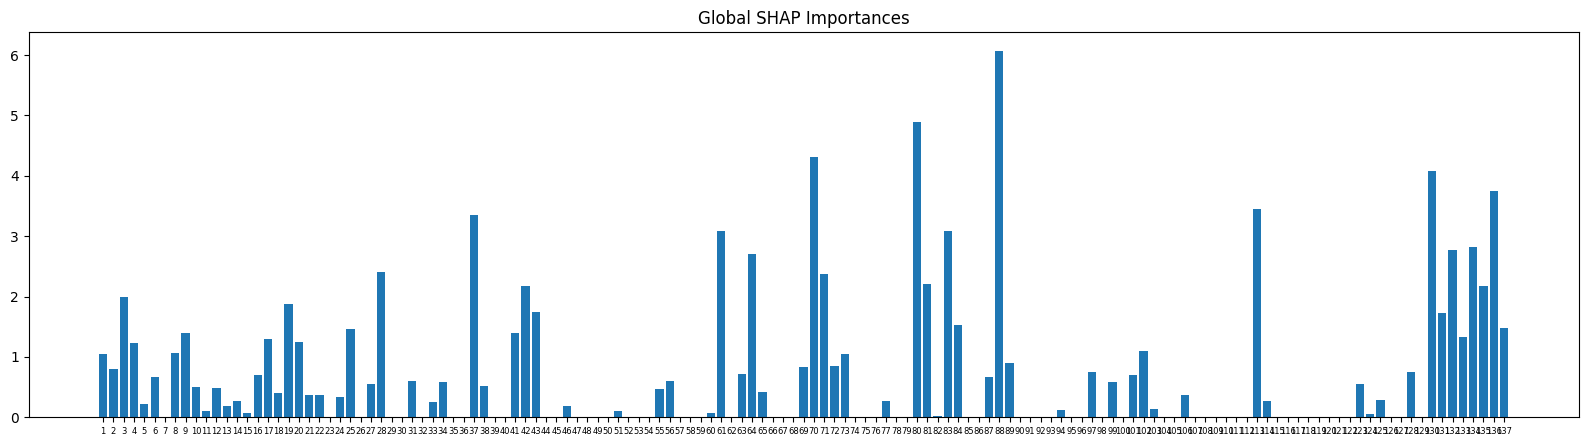

In [35]:
# import shap
# Xshap = shap.kmeans(X_train, 20)
explainer = shap.Explainer(model.predict, X) # shap.data)
shapvals = explainer(X_test[:100])

plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, sumabs)
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=6)
plt.title("Global SHAP Importances")

Text(0.5, 1.0, 'Global SHAP Importances')

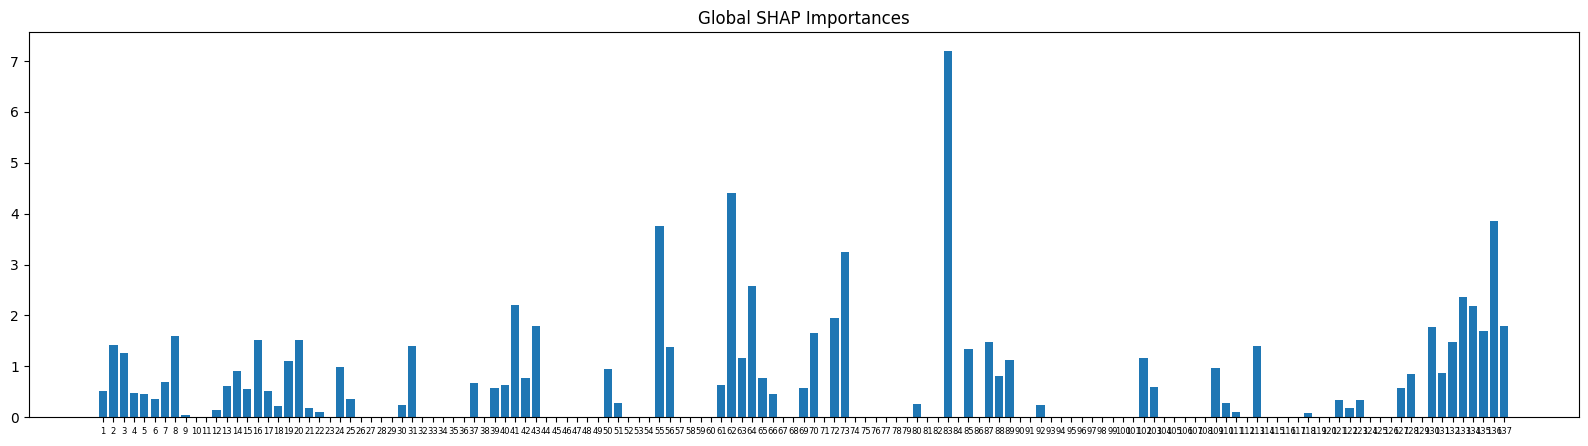

In [ ]:
# # import shap
# # Xshap = shap.kmeans(X_train, 20)
# explainer = shap.Explainer(model.predict, X) # shap.data)
# shapvals = explainer(X_test[:100])

# plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
# sumabs = np.sum(np.abs(shapvals.values), axis=0)
# plt.bar(X_axis, sumabs)
# plt.xticks(X_axis)
# plt.xticks(X_axis, fontsize=6)
# plt.title("Global SHAP Importances")

# Add a 1D CNN model + interpret

In [38]:
# # Add a 1D CNN model + interpret
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.utils import shuffle
# from sklearn.inspection import permutation_importance

# # # Create dummy data
# # x_train = np.random.rand(1000, 10, 1)
# # y_train = np.random.rand(1000) * 100

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=x_train.shape), #(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile and train the model
# model.compile(optimizer='adam', loss='mse')
# model.fit(x_train, y_train, epochs=10, batch_size=32)

# # Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

# # To fix the error, change the score_func
# def score_func(estimator, X, y):
#     pred = estimator.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

# # Create a copy of x_train reshaped for scoring
# x_train_reshaped = x_train.reshape((1000, 10))

# # Calculate permutation importance
# results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)

# # Output feature importance
# importance = results.importances_mean
# for i, imp in enumerate(importance):
#     print(f"Feature {i+1} importance: {imp}")

To enhance the provided code with a test set and plotting of evaluation metrics, specifically the mean squared error (MSE) on both training and test datasets, you can follow these steps. I'll use Matplotlib for plotting.


In [39]:

# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.model_selection import train_test_split

# # Create dummy data
# x = np.random.rand(1200, 10, 1)
# y = np.random.rand(1200) * 100

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model and save history
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# # Plot the training and validation loss
# plt.plot(history.history['loss'], label='Train MSE')
# plt.plot(history.history['val_loss'], label='Test MSE')
# plt.title('Model MSE')
# plt.ylabel('Mean Squared Error')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.show()

In [36]:
# Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))
# # To fix the error, change the score_func:
# def score_func(estimator, X, y):
#     pred = estimator.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# # # Create a copy of x_train reshaped for scoring
# X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))

# # Calculate permutation importance
# results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
# Use X_train directly without reshaping
results = permutation_importance(model, np.asarray(X_train), np.asarray(y_train), scoring=score_func)


# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")

Feature 1 importance: -0.000776397515527949
Feature 2 importance: 0.00031055900621118073
Feature 3 importance: -0.004037267080745341
Feature 4 importance: -0.0006211180124223586
Feature 5 importance: 0.0
Feature 6 importance: -0.00015527950310558896
Feature 7 importance: 0.0
Feature 8 importance: 0.0007763975155279504
Feature 9 importance: -0.0017080745341614884
Feature 10 importance: -0.0003105590062111779
Feature 11 importance: 0.0010869565217391324
Feature 12 importance: -0.00031055900621118073
Feature 13 importance: -0.0006211180124223601
Feature 14 importance: 0.0010869565217391324
Feature 15 importance: -0.00015527950310559037
Feature 16 importance: 0.0009316770186335421
Feature 17 importance: -0.000931677018633538
Feature 18 importance: 0.00015527950310559037
Feature 19 importance: -0.0017080745341614884
Feature 20 importance: -0.00015527950310558757
Feature 21 importance: 0.0018633540372670842
Feature 22 importance: -0.0009316770186335394
Feature 23 importance: 0.0
Feature 24 i

In [ ]:
# # Evaluate feature importance
# # def score_func(X, y):
# #     pred = model.predict(X)
# #     return np.mean(np.abs(y - pred.flatten()))
# # # To fix the error, change the score_func:
# # def score_func(estimator, X, y):
# #     pred = estimator.predict(X)
# #     return np.mean(np.abs(y - pred.flatten()))

# def score_func(estimator, X, y):
#     pred = estimator.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

# # # # Create a copy of x_train reshaped for scoring
# # X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))

# # # Calculate permutation importance
# # results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
# # Use X_train directly without reshaping
# results = permutation_importance(model, np.asarray(X_train), np.asarray(y_train), scoring=score_func)


# # Output feature importance
# importance = results.importances_mean
# for i, imp in enumerate(importance):
#     print(f"Feature {i+1} importance: {imp}")

Feature 1 importance: -0.000312744331508992
Feature 2 importance: -0.004691164972634871
Feature 3 importance: -0.008913213448006253
Feature 4 importance: -0.0023455824863174352
Feature 5 importance: -0.0006254886630179826
Feature 6 importance: -0.0007818608287724779
Feature 7 importance: -0.00218921032056294
Feature 8 importance: -0.006098514464425333
Feature 9 importance: 0.0
Feature 10 importance: 0.0
Feature 11 importance: 0.0
Feature 12 importance: 0.0001563721657544953
Feature 13 importance: 0.0001563721657544953
Feature 14 importance: 0.0012509773260359666
Feature 15 importance: -0.002501954652071932
Feature 16 importance: -0.006567630961688819
Feature 17 importance: -0.0014073494917904619
Feature 18 importance: -0.000625488663017984
Feature 19 importance: -0.00875684128225176
Feature 20 importance: -0.0032838154808444097
Feature 21 importance: 0.000625488663017984
Feature 22 importance: -0.002345582486317434
Feature 23 importance: 0.0
Feature 24 importance: -0.002345582486317436

In [41]:
import numpy as np
from sklearn.inspection import permutation_importance

# Ensure X_train is a NumPy array
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# Define scoring function
def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# Check shape before calling permutation_importance
print("X_train shape:", X_train.shape)

# Calculate permutation importance
results = permutation_importance(model, X_train, y_train, scoring=score_func)

# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")


X_train shape: (1279, 137)
Feature 1 importance: -0.0009382329945269747
Feature 2 importance: -0.0045347928068803734
Feature 3 importance: -0.008131352619233777
Feature 4 importance: -0.0020328381548084433
Feature 5 importance: -0.0012509773260359653
Feature 6 importance: -0.0006254886630179826
Feature 7 importance: -0.001720093823299454
Feature 8 importance: -0.006724003127443315
Feature 9 importance: 0.0
Feature 10 importance: 0.0
Feature 11 importance: 0.0
Feature 12 importance: 0.0007818608287724779
Feature 13 importance: -0.00046911649726348733
Feature 14 importance: 0.0001563721657544953
Feature 15 importance: -0.002971071149335419
Feature 16 importance: -0.010633307271305707
Feature 17 importance: -0.0020328381548084446
Feature 18 importance: -0.0004691164972634887
Feature 19 importance: -0.008600469116497264
Feature 20 importance: -0.0032838154808444097
Feature 21 importance: 0.0014073494917904634
Feature 22 importance: -0.002971071149335419
Feature 23 importance: 0.0
Feature 2

In [37]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, num_features)
print("y_train shape:", y_train.shape)  # Should be (num_samples,)

X_train shape: (1288, 137)
y_train shape: (1288,)


In [ ]:
# print("X_train shape:", X_train.shape)  # Should be (num_samples, num_features)
# print("y_train shape:", y_train.shape)  # Should be (num_samples,)

X_train shape: (1279, 137)
y_train shape: (1279,)


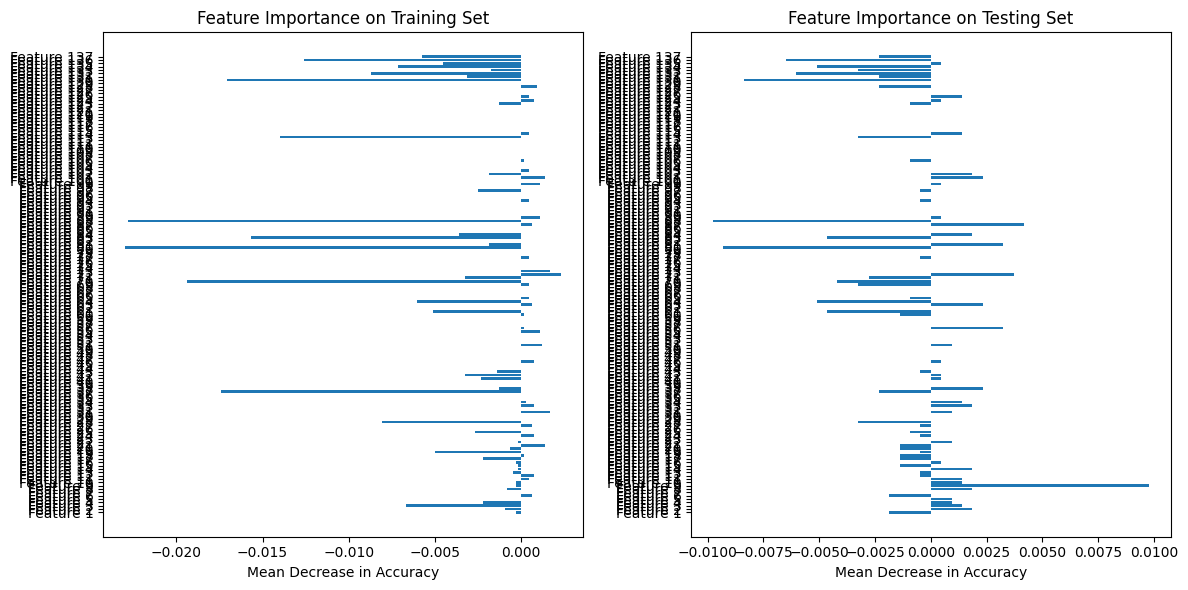

In [38]:
# To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# # Assume x and y are your full dataset and labels
# x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape for scoring
X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))
X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1]))

# Calculate permutation importance on training data
train_results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test_reshaped, y_test, scoring=score_func)

# Plotting
features = [f"Feature {i+1}" for i in range(X_train_reshaped.shape[1])]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.tight_layout()
plt.show()

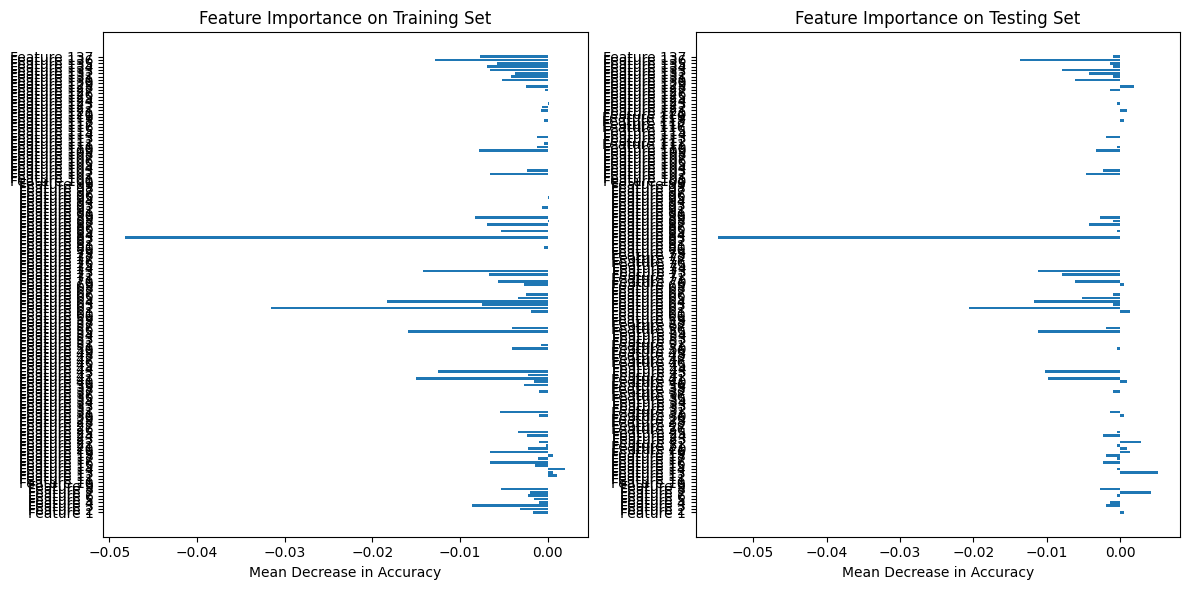

In [ ]:
# # To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.inspection import permutation_importance
# from sklearn.model_selection import train_test_split

# # # Assume x and y are your full dataset and labels
# # x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Reshape for scoring
# X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))
# X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1]))

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, X_test_reshaped, y_test, scoring=score_func)

# # Plotting
# features = [f"Feature {i+1}" for i in range(X_train_reshaped.shape[1])]
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.barh(features, train_results.importances_mean)
# plt.title('Feature Importance on Training Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.subplot(1, 2, 2)
# plt.barh(features, test_results.importances_mean)
# plt.title('Feature Importance on Testing Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.tight_layout()
# plt.show()

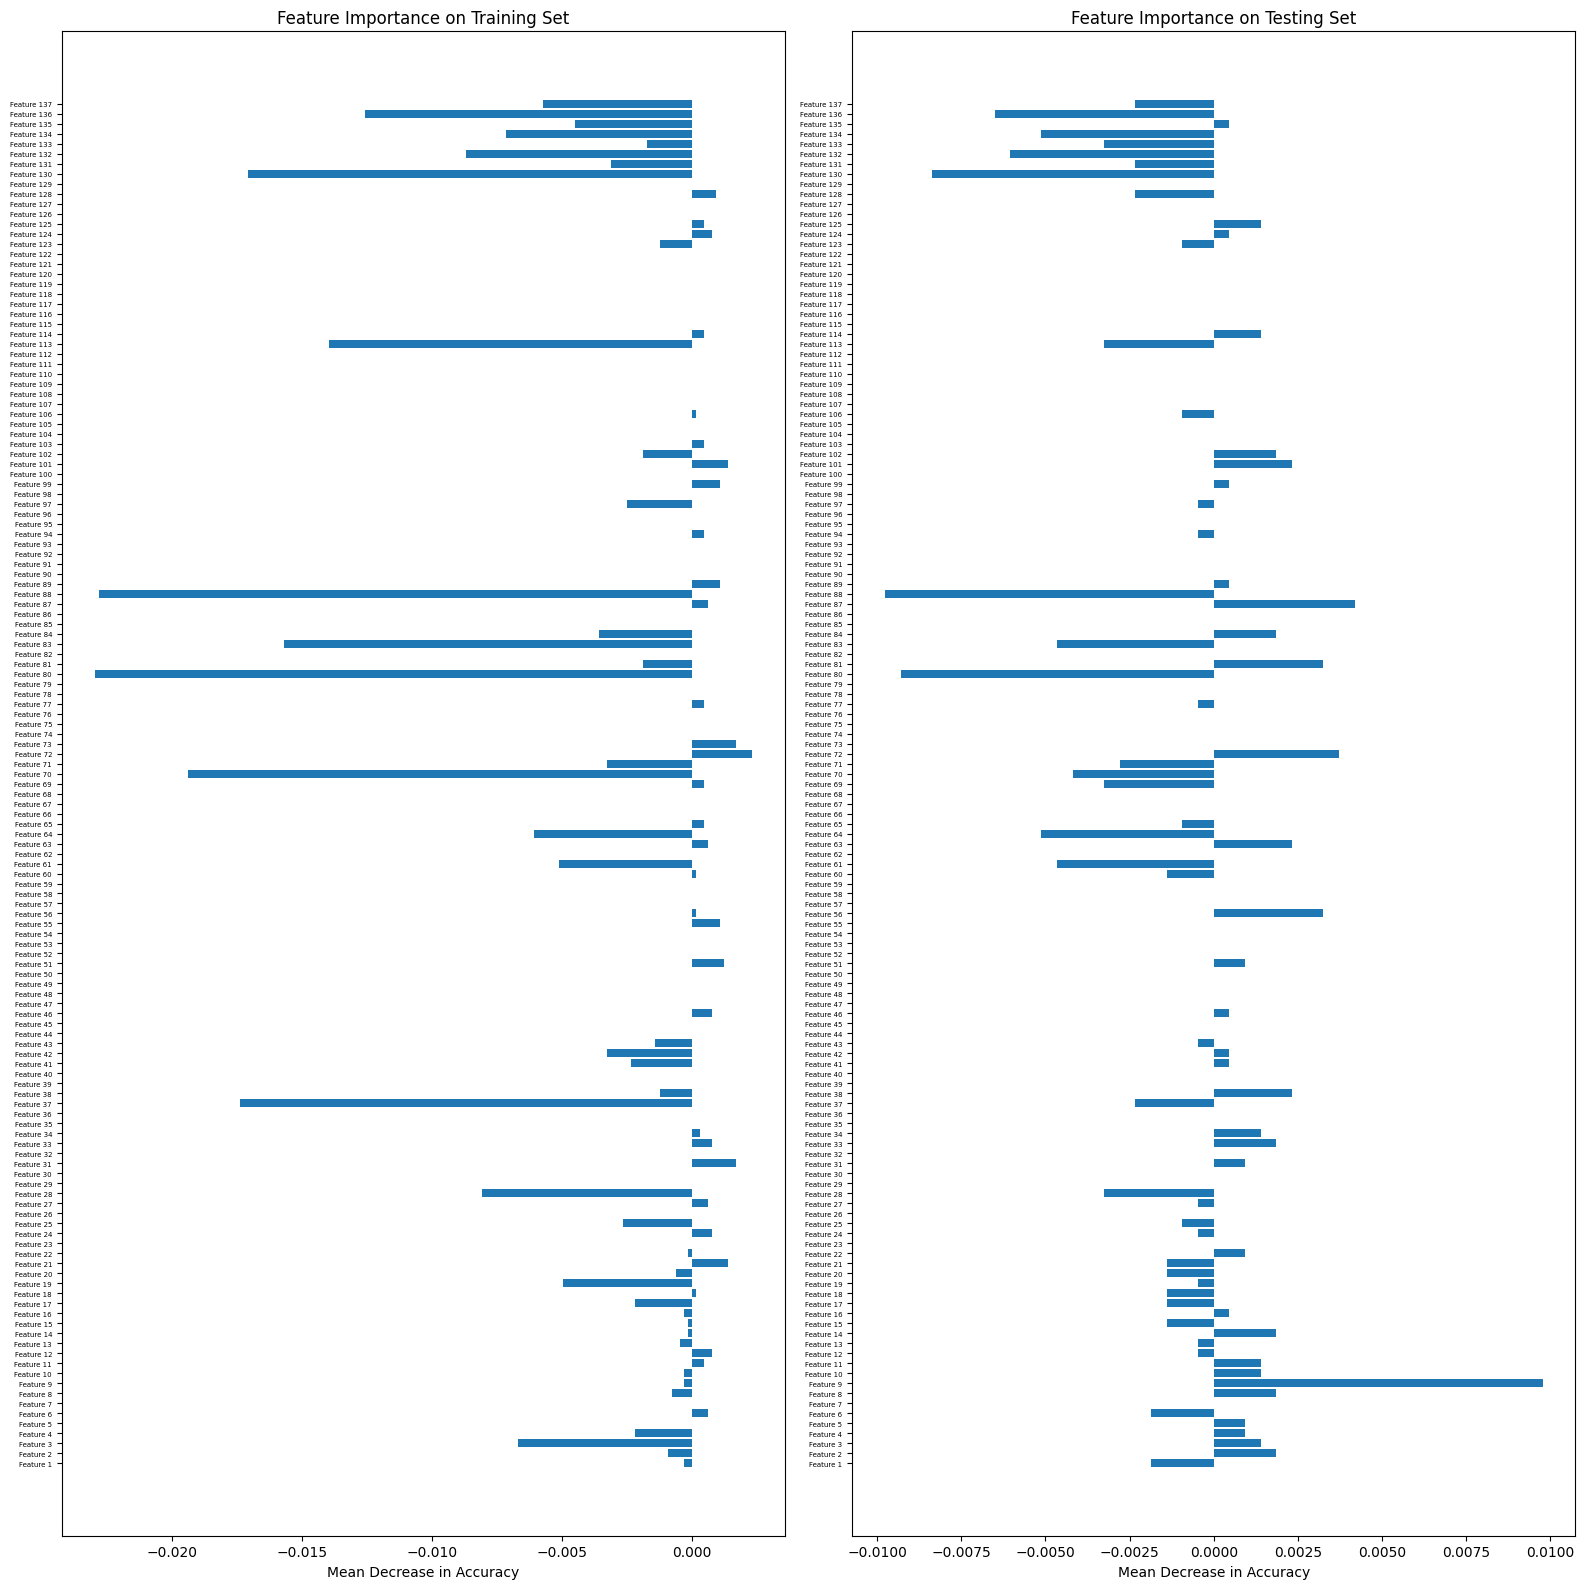

In [39]:
# Plotting
features = [f"Feature {i+1}" for i in range(X_train_reshaped.shape[1])]
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')
plt.yticks(fontsize=5)  # <-- Make y-axis labels smaller

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')
plt.yticks(fontsize=5)  # <-- Make y-axis labels smaller

plt.tight_layout()
plt.show()

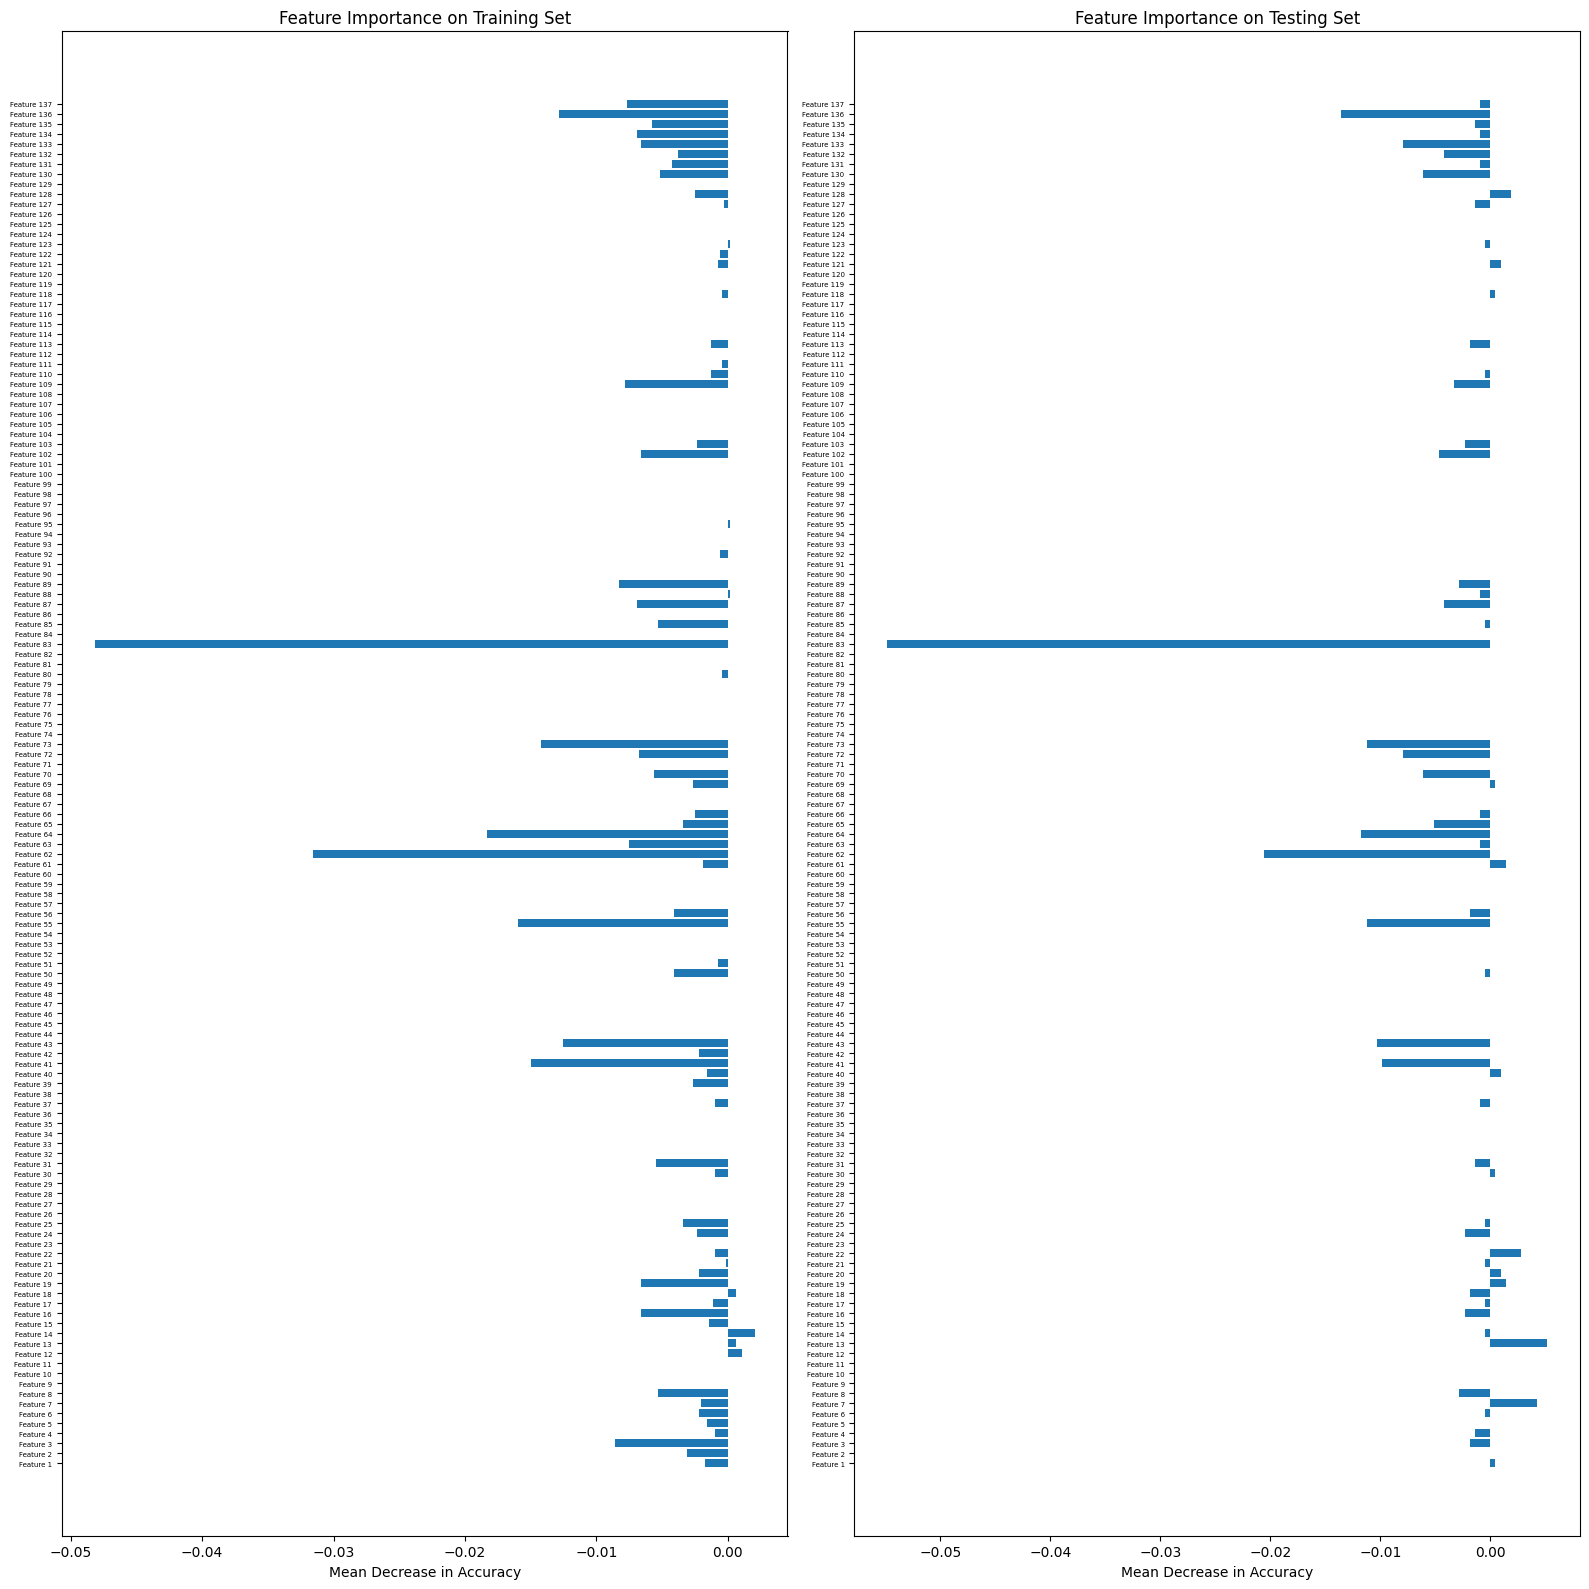

In [ ]:
# # Plotting
# features = [f"Feature {i+1}" for i in range(X_train_reshaped.shape[1])]
# plt.figure(figsize=(16, 16))
# plt.subplot(1, 2, 1)
# plt.barh(features, train_results.importances_mean)
# plt.title('Feature Importance on Training Set')
# plt.xlabel('Mean Decrease in Accuracy')
# plt.yticks(fontsize=5)  # <-- Make y-axis labels smaller

# plt.subplot(1, 2, 2)
# plt.barh(features, test_results.importances_mean)
# plt.title('Feature Importance on Testing Set')
# plt.xlabel('Mean Decrease in Accuracy')
# plt.yticks(fontsize=5)  # <-- Make y-axis labels smaller

# plt.tight_layout()
# plt.show()

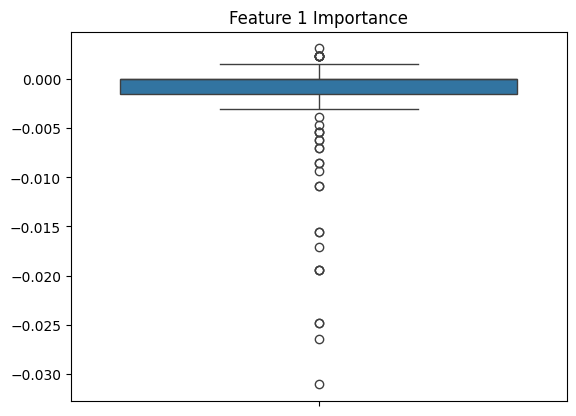

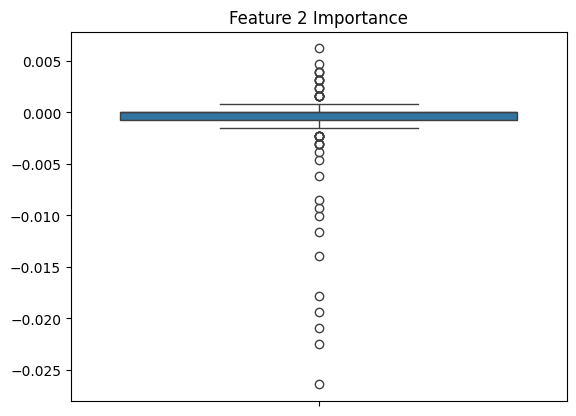

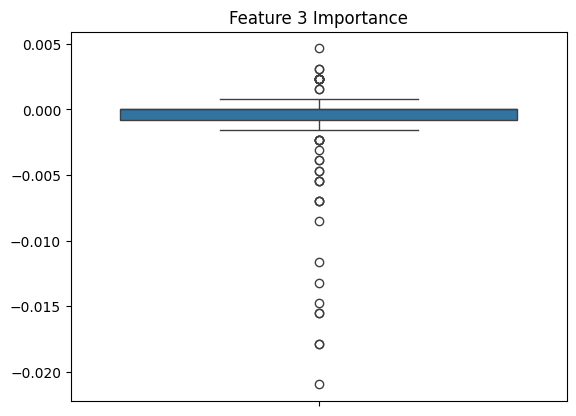

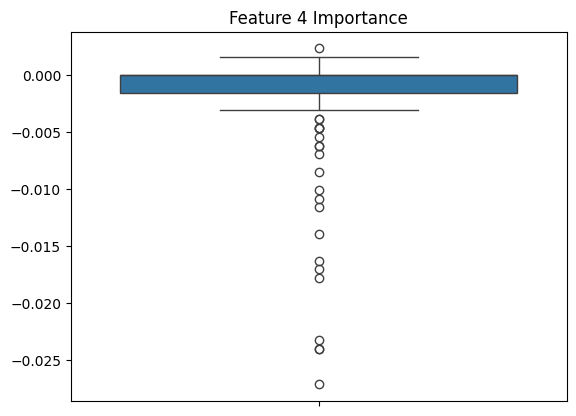

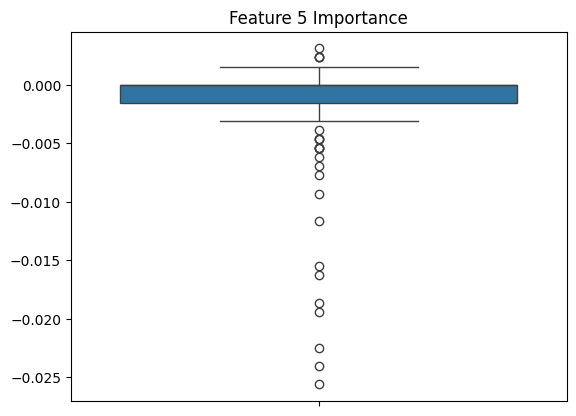

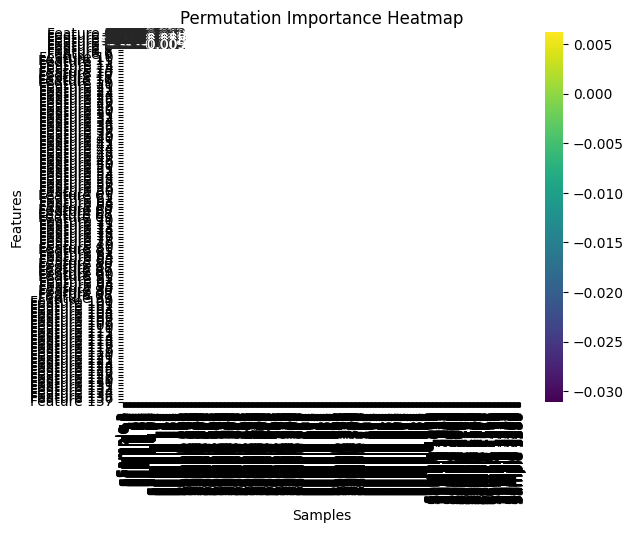

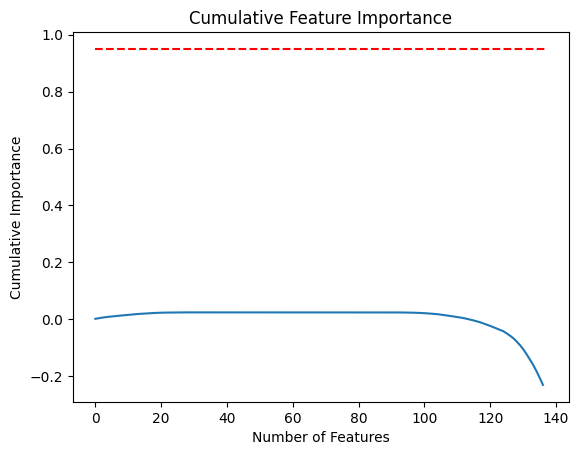

In [40]:
# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# Box Plot:
# A box plot can show the distribution of permutation importances across multiple runs, giving you a sense of variability in feature importance.
import seaborn as sns

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

train_results = permutation_importance(model, X_train, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test, y_test, scoring=score_func)

# Assuming 'results' is the output from permutation_importance
# for i in range(x_train_reshaped.shape[1]):
#     sns.boxplot(data=results.importances[:, i], orient='v')
#     plt.title(f'Feature {i+1} Importance')
#     plt.show()
# Correctly access the importances array
num_features = results.importances.shape[1]  # This ensures you are within the correct range

for i in range(num_features):
    sns.boxplot(data=results.importances[:, i], orient='v')
    plt.title(f'Feature {i+1} Importance')
    plt.show()

# Feature Importance Heatmap:
# If your dataset isn't too large, you can visualize the importance across multiple features and samples using a heatmap.
import seaborn as sns
# Create a heatmap of the feature importance scores
sns.heatmap(results.importances.T, annot=True, cmap='viridis', fmt=".3f",
            xticklabels=[f"Sample {i+1}" for i in range(X_train.shape[0])],
            yticklabels=[f"Feature {i+1}" for i in range(X_train.shape[1])])
plt.title('Permutation Importance Heatmap')
plt.xlabel('Samples')
plt.ylabel('Features')
plt.show()

# Cumulative Importance Plot:
# This plot can help identify the number of features required to reach a certain threshold of total importance.
import numpy as np
import matplotlib.pyplot as plt

# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()
# These visualizations provide different perspectives on feature importance, helping you to better understand which features contribute most to the model and how stable their contributions are across different data subsets.


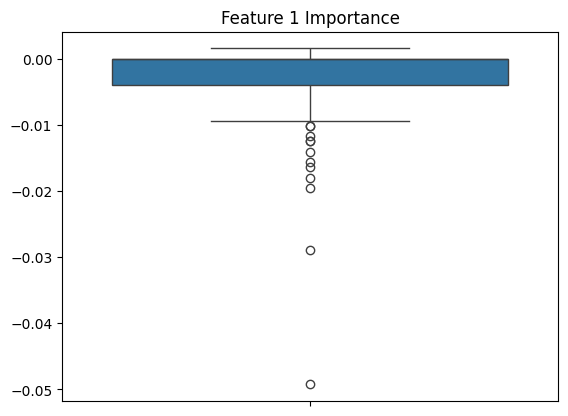

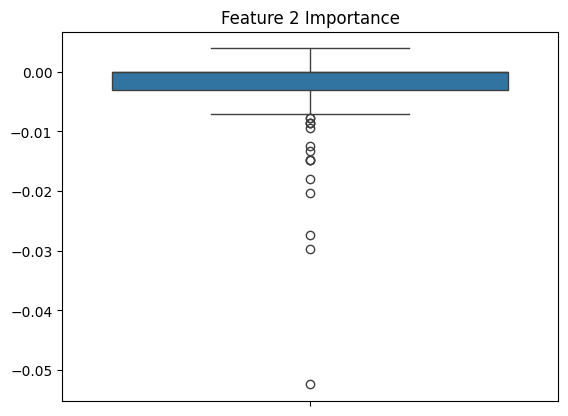

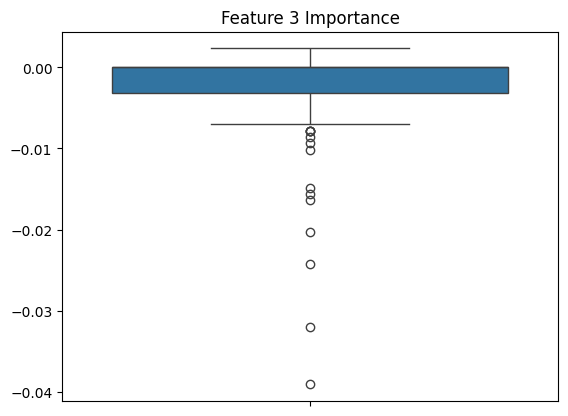

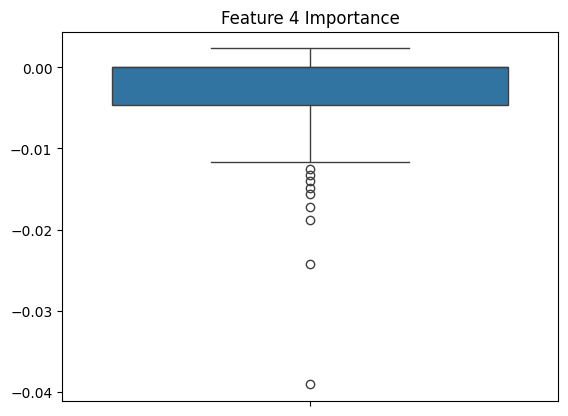

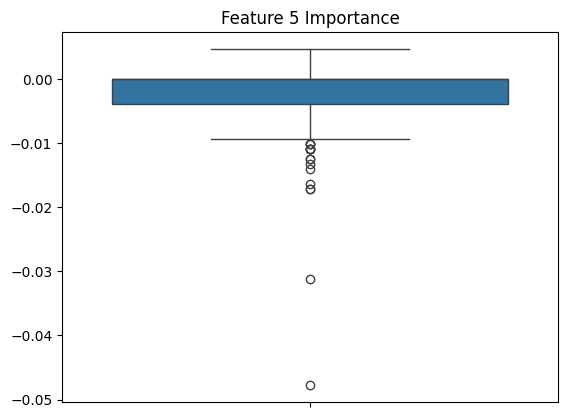

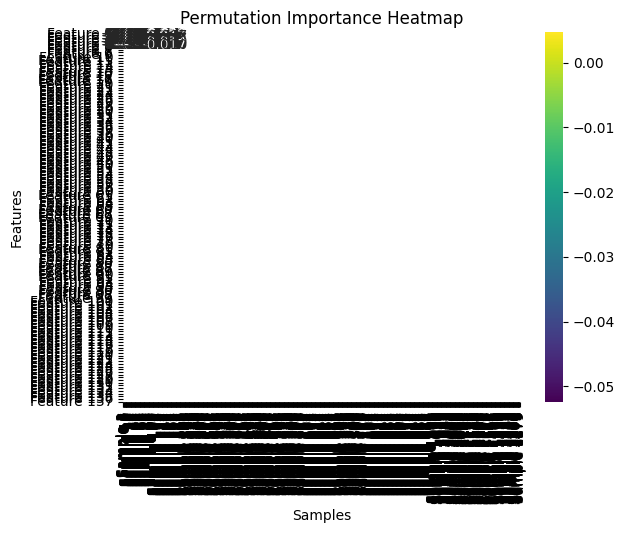

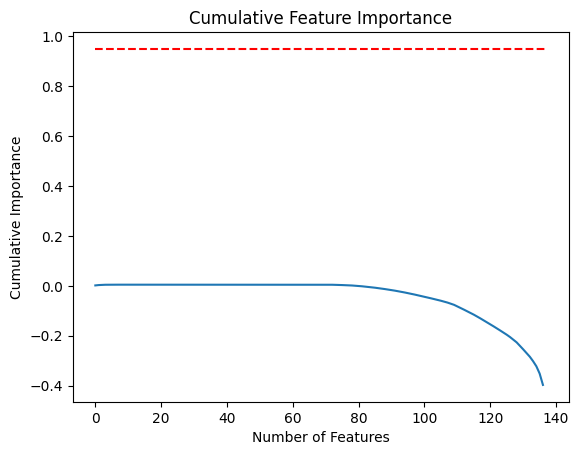

In [ ]:
# # To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# # To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# # Box Plot:
# # A box plot can show the distribution of permutation importances across multiple runs, giving you a sense of variability in feature importance.
# import seaborn as sns

# # # Calculate permutation importance on training data
# # train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# # test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

# train_results = permutation_importance(model, X_train, y_train, scoring=score_func)
# test_results = permutation_importance(model, X_test, y_test, scoring=score_func)

# # Assuming 'results' is the output from permutation_importance
# # for i in range(x_train_reshaped.shape[1]):
# #     sns.boxplot(data=results.importances[:, i], orient='v')
# #     plt.title(f'Feature {i+1} Importance')
# #     plt.show()
# # Correctly access the importances array
# num_features = results.importances.shape[1]  # This ensures you are within the correct range

# for i in range(num_features):
#     sns.boxplot(data=results.importances[:, i], orient='v')
#     plt.title(f'Feature {i+1} Importance')
#     plt.show()

# # Feature Importance Heatmap:
# # If your dataset isn't too large, you can visualize the importance across multiple features and samples using a heatmap.
# import seaborn as sns
# # Create a heatmap of the feature importance scores
# sns.heatmap(results.importances.T, annot=True, cmap='viridis', fmt=".3f",
#             xticklabels=[f"Sample {i+1}" for i in range(X_train.shape[0])],
#             yticklabels=[f"Feature {i+1}" for i in range(X_train.shape[1])])
# plt.title('Permutation Importance Heatmap')
# plt.xlabel('Samples')
# plt.ylabel('Features')
# plt.show()

# # Cumulative Importance Plot:
# # This plot can help identify the number of features required to reach a certain threshold of total importance.
# import numpy as np
# import matplotlib.pyplot as plt

# # Calculate cumulative importance
# sorted_idx = np.argsort(results.importances_mean)[::-1]
# cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

# plt.plot(cumulative_importance)
# plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
# plt.title('Cumulative Feature Importance')
# plt.xlabel('Number of Features')
# plt.ylabel('Cumulative Importance')
# plt.show()
# # These visualizations provide different perspectives on feature importance, helping you to better understand which features contribute most to the model and how stable their contributions are across different data subsets.


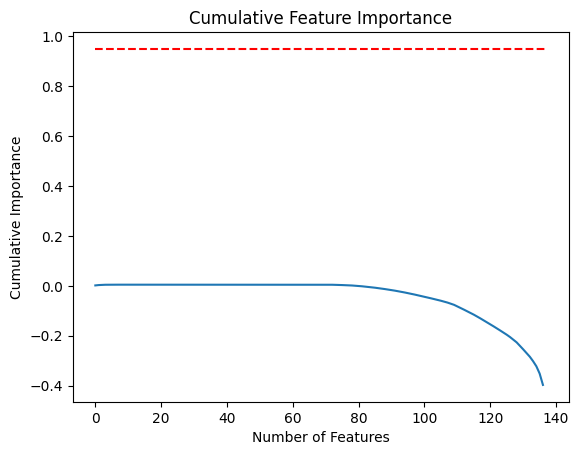

In [46]:
# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()

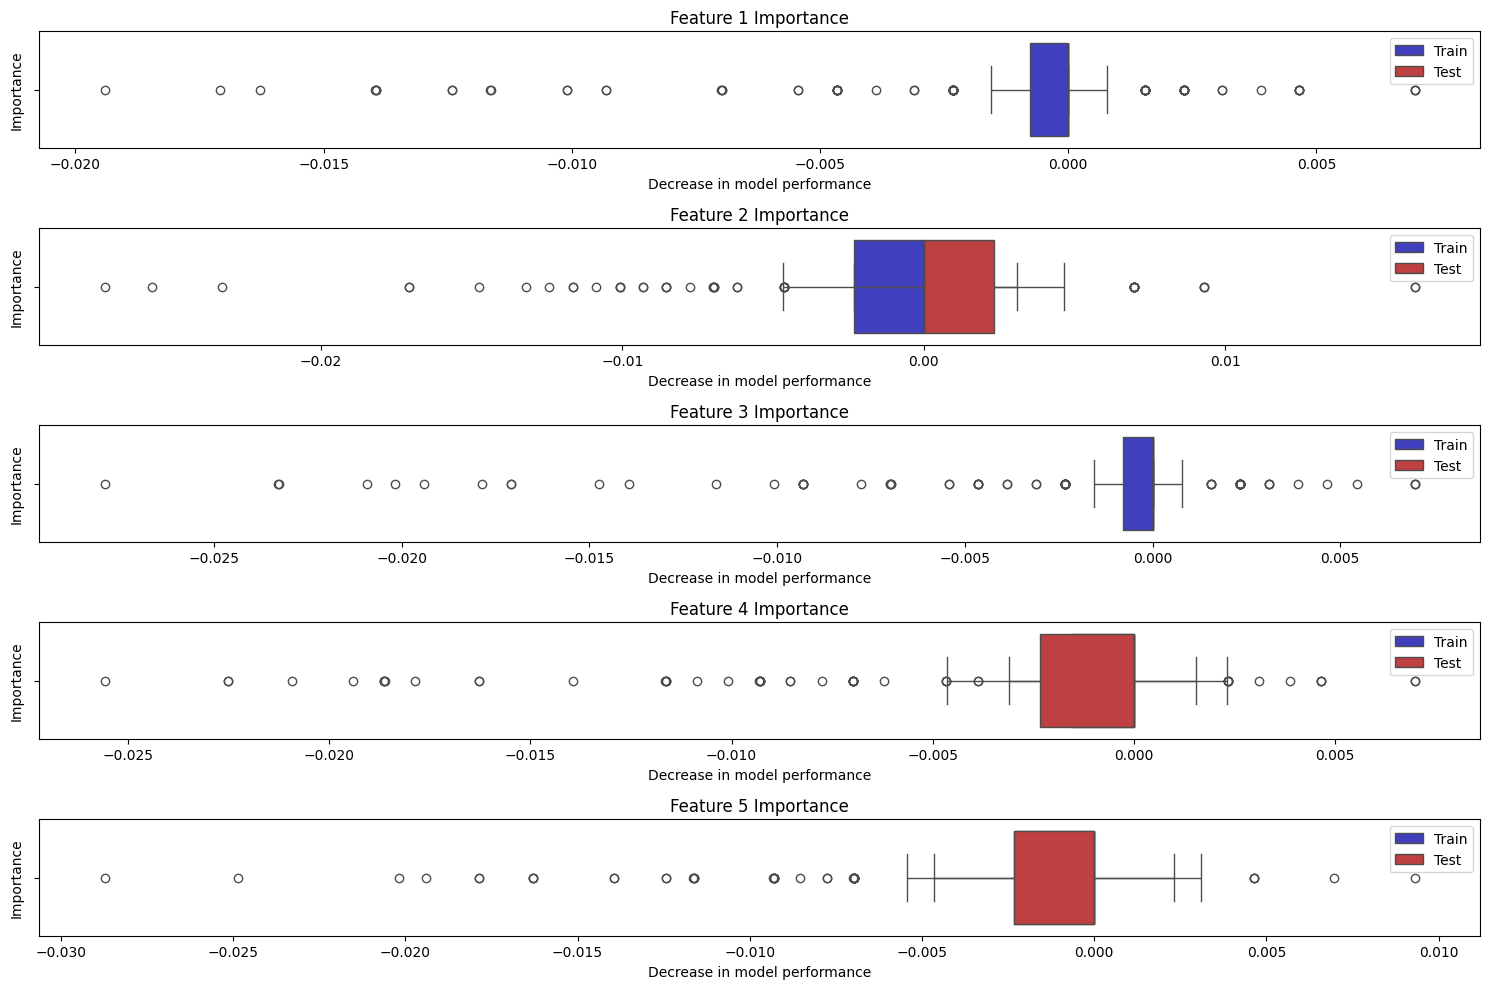

In [41]:
# To properly visualize permutation importance for both training and testing data in your machine learning model, let's refine the existing code to ensure correct use of both train_results and test_results. We will also plot these results side by side for each feature for better comparison.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_results' and 'test_results' are already calculated
num_features = train_results.importances.shape[1]

plt.figure(figsize=(15, 10))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    # Plotting training data importance
    sns.boxplot(data=train_results.importances[:, i], color='blue', orient='h', saturation=0.5)
    # Plotting test data importance
    sns.boxplot(data=test_results.importances[:, i], color='red', orient='h', saturation=0.5)
    plt.title(f'Feature {i+1} Importance')
    plt.xlabel('Decrease in model performance')
    plt.ylabel('Importance')
    plt.legend(['Train', 'Test'])
plt.tight_layout()
plt.show()

# Explanation:
# Box Plot Modifications: Each feature's importance from both the training and testing datasets is plotted side by side to directly compare their distributions and see how the model reacts to the shuffling of each feature set.
# Layout Adjustments: Using plt.subplot() to plot each feature's importance on a separate subplot for clarity.
# Color Coding: Different colors for training and testing datasets help in distinguishing between the two, enhancing visual understanding.
# This code modification will help you clearly visualize how the permutation importance varies between training and testing datasets, thereby providing insights into model generalization and potential overfitting.

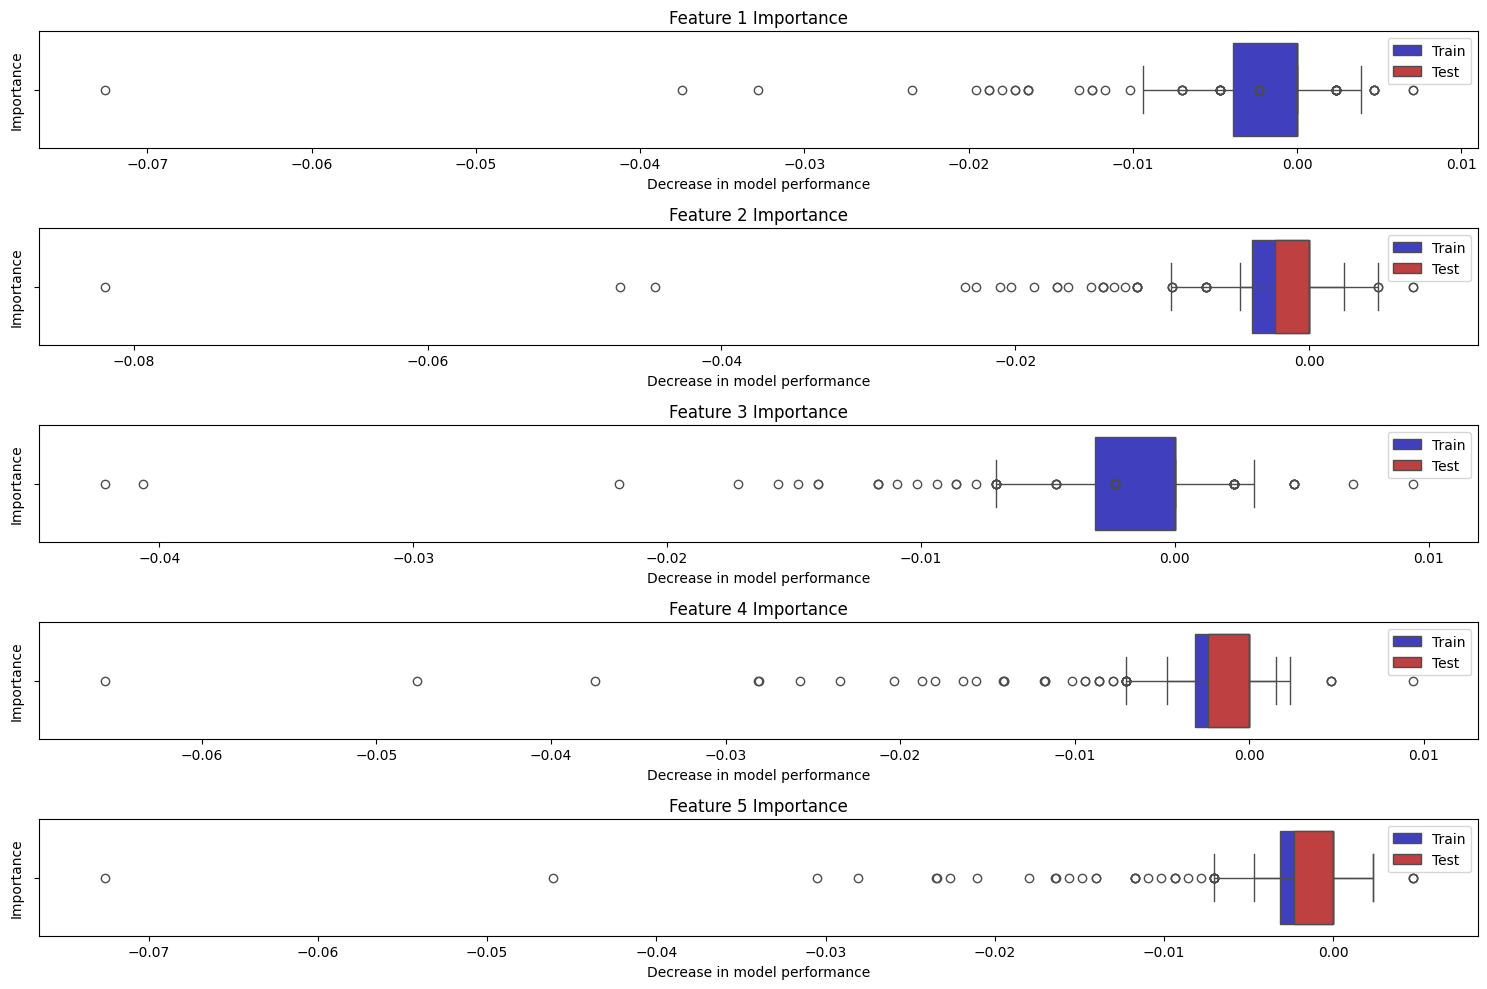

In [ ]:
# # To properly visualize permutation importance for both training and testing data in your machine learning model, let's refine the existing code to ensure correct use of both train_results and test_results. We will also plot these results side by side for each feature for better comparison.

# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'train_results' and 'test_results' are already calculated
# num_features = train_results.importances.shape[1]

# plt.figure(figsize=(15, 10))
# for i in range(num_features):
#     plt.subplot(num_features, 1, i + 1)
#     # Plotting training data importance
#     sns.boxplot(data=train_results.importances[:, i], color='blue', orient='h', saturation=0.5)
#     # Plotting test data importance
#     sns.boxplot(data=test_results.importances[:, i], color='red', orient='h', saturation=0.5)
#     plt.title(f'Feature {i+1} Importance')
#     plt.xlabel('Decrease in model performance')
#     plt.ylabel('Importance')
#     plt.legend(['Train', 'Test'])
# plt.tight_layout()
# plt.show()

# # Explanation:
# # Box Plot Modifications: Each feature's importance from both the training and testing datasets is plotted side by side to directly compare their distributions and see how the model reacts to the shuffling of each feature set.
# # Layout Adjustments: Using plt.subplot() to plot each feature's importance on a separate subplot for clarity.
# # Color Coding: Different colors for training and testing datasets help in distinguishing between the two, enhancing visual understanding.
# # This code modification will help you clearly visualize how the permutation importance varies between training and testing datasets, thereby providing insights into model generalization and potential overfitting.

In [42]:
features, test_results.importances_mean


(['Feature 1',
  'Feature 2',
  'Feature 3',
  'Feature 4',
  'Feature 5',
  'Feature 6',
  'Feature 7',
  'Feature 8',
  'Feature 9',
  'Feature 10',
  'Feature 11',
  'Feature 12',
  'Feature 13',
  'Feature 14',
  'Feature 15',
  'Feature 16',
  'Feature 17',
  'Feature 18',
  'Feature 19',
  'Feature 20',
  'Feature 21',
  'Feature 22',
  'Feature 23',
  'Feature 24',
  'Feature 25',
  'Feature 26',
  'Feature 27',
  'Feature 28',
  'Feature 29',
  'Feature 30',
  'Feature 31',
  'Feature 32',
  'Feature 33',
  'Feature 34',
  'Feature 35',
  'Feature 36',
  'Feature 37',
  'Feature 38',
  'Feature 39',
  'Feature 40',
  'Feature 41',
  'Feature 42',
  'Feature 43',
  'Feature 44',
  'Feature 45',
  'Feature 46',
  'Feature 47',
  'Feature 48',
  'Feature 49',
  'Feature 50',
  'Feature 51',
  'Feature 52',
  'Feature 53',
  'Feature 54',
  'Feature 55',
  'Feature 56',
  'Feature 57',
  'Feature 58',
  'Feature 59',
  'Feature 60',
  'Feature 61',
  'Feature 62',
  'Feature 63',
 

In [43]:
X_axis


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137])

/tmp/ipykernel_1642994/263249246.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


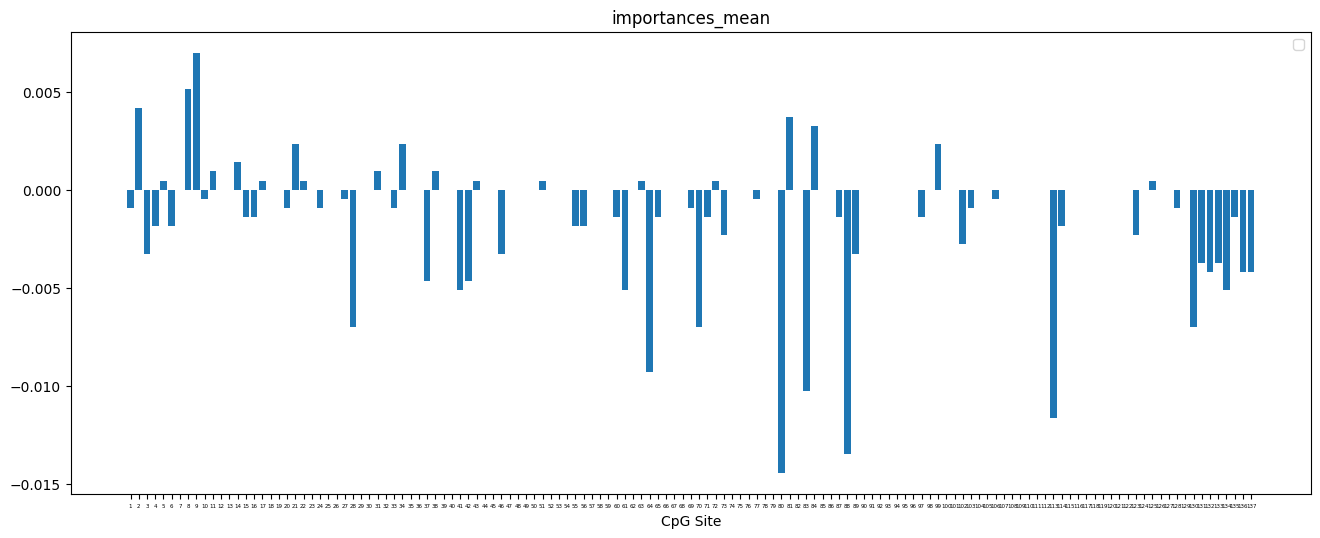

In [44]:
plt.figure(figsize=(16, 6))

# for i in range(1,3):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis, test_results.importances_mean) # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
# plt.yticks(fontsize=5)  # <-- Make y-axis labels smaller
plt.xticks(X_axis, fontsize=4)
plt.show()

/tmp/ipykernel_1641304/263249246.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


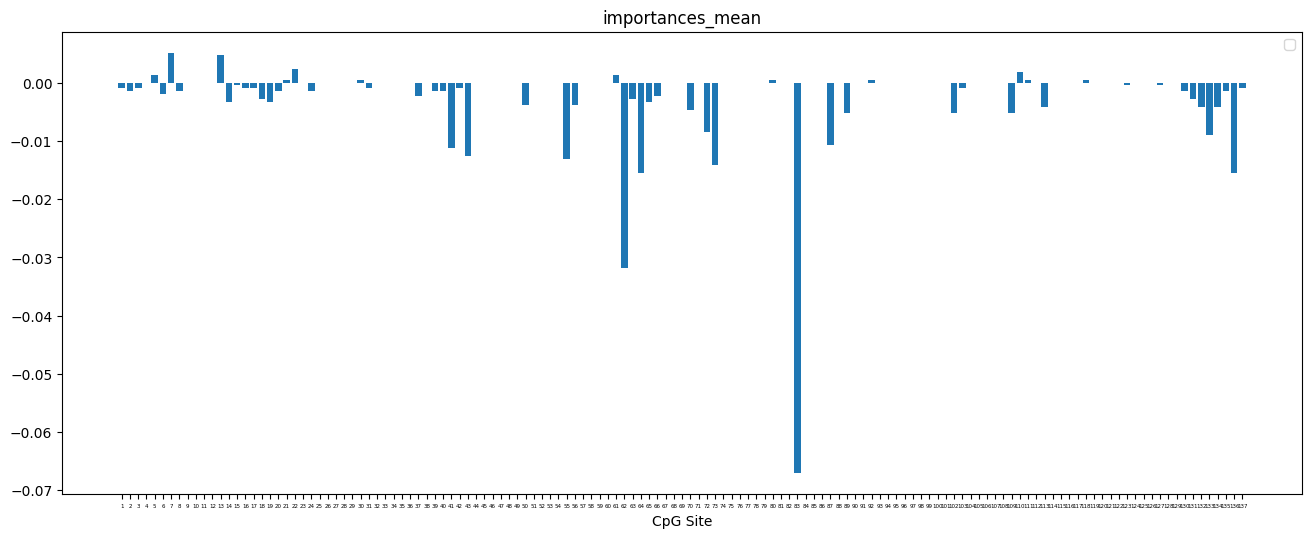

In [ ]:
# plt.figure(figsize=(16, 6))

# # for i in range(1,3):
#     # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
# plt.bar(X_axis, test_results.importances_mean) # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

# plt.legend()
# plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
# plt.xlabel("CpG Site")
# plt.xticks(X_axis)
# # plt.yticks(fontsize=5)  # <-- Make y-axis labels smaller
# plt.xticks(X_axis, fontsize=4)
# plt.show()

In [46]:
shifts

[-0.4, 0.1]

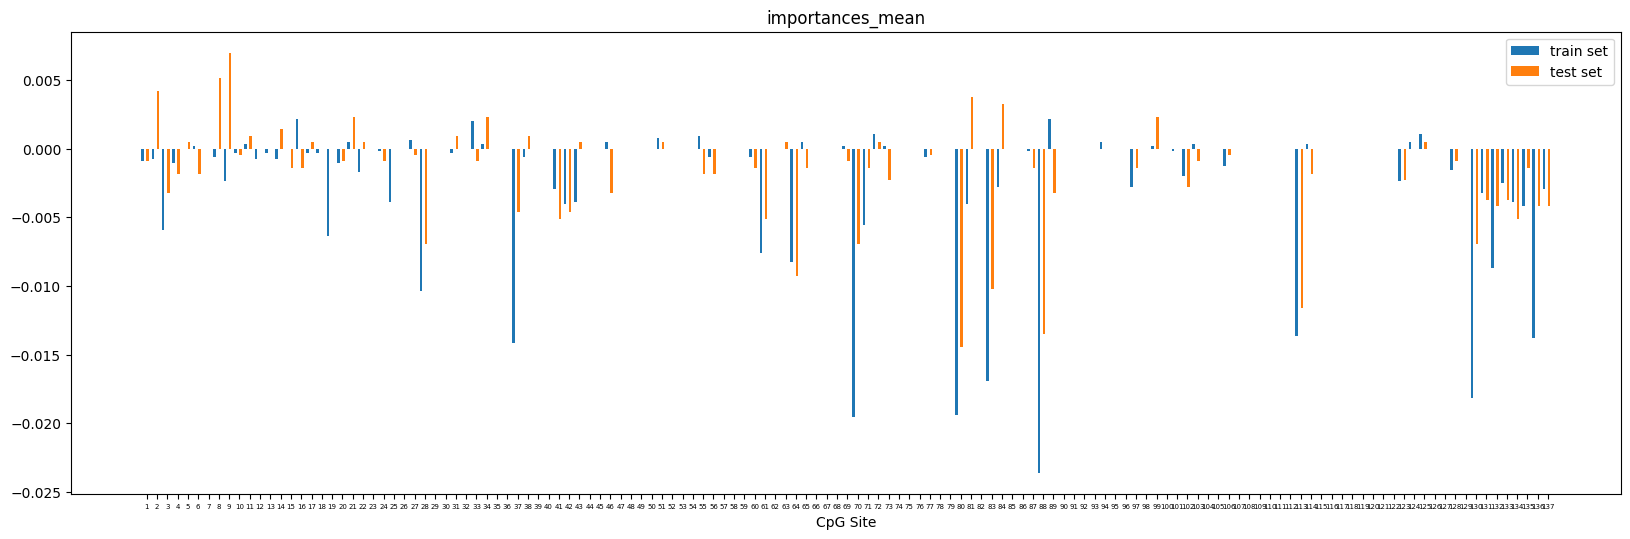

In [45]:
shifts =  [-0.4, 0.1]
# [-0.4, -0.15, 0.1]
# for i in range(1,3):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.figure(figsize=(20, 6))

plt.bar(X_axis+shifts[0], train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=5)
plt.show()

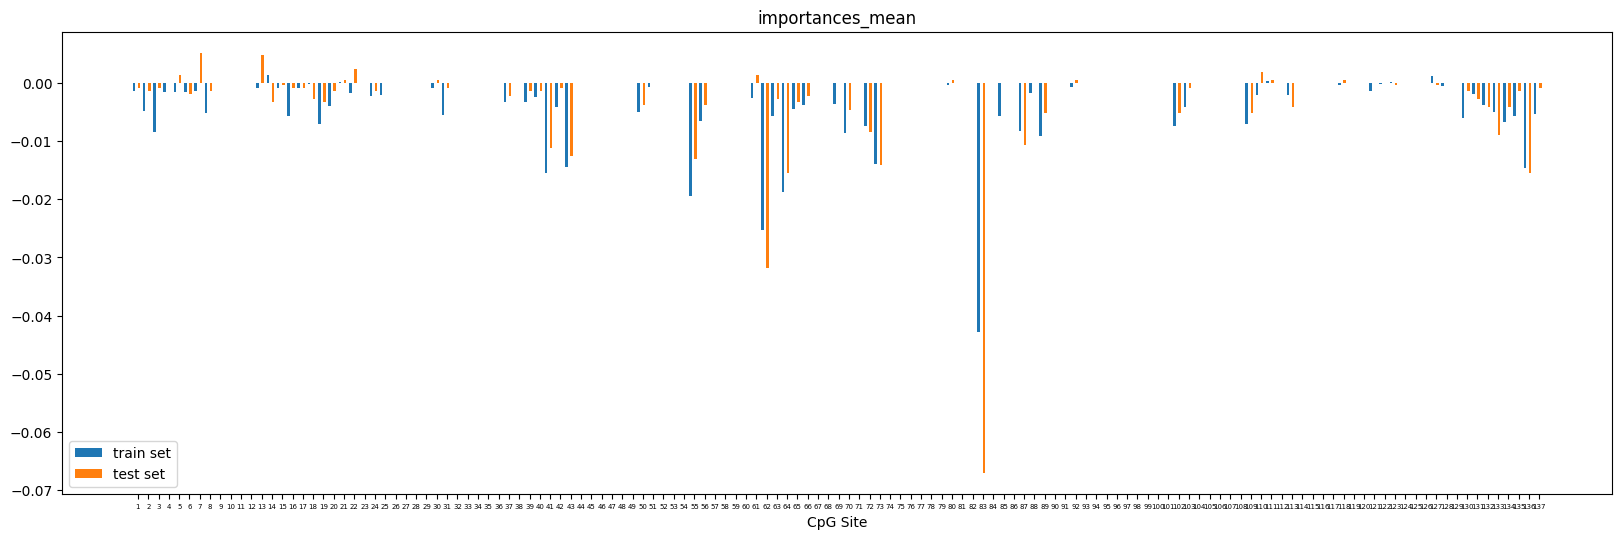

In [ ]:
# shifts =  [-0.4, 0.1]
# # [-0.4, -0.15, 0.1]
# # for i in range(1,3):
# #     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
# plt.figure(figsize=(20, 6))

# plt.bar(X_axis+shifts[0], train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
# plt.bar(X_axis+shifts[1], test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

# plt.legend()
# plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
# plt.xlabel("CpG Site")
# plt.xticks(X_axis, size=5)
# plt.show()

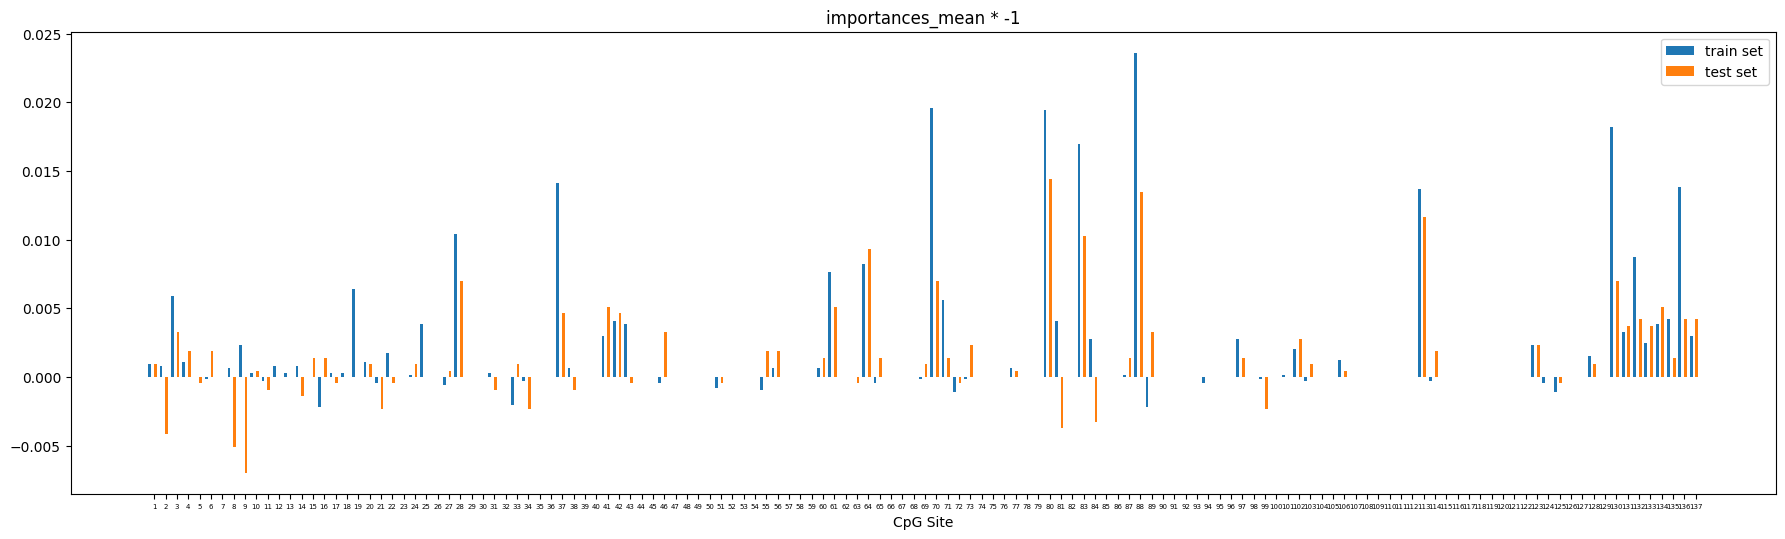

In [47]:
plt.figure(figsize=(22, 6))
plt.bar(X_axis+shifts[0], (-1)*train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], (-1)*test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean * -1")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=5)
plt.show()

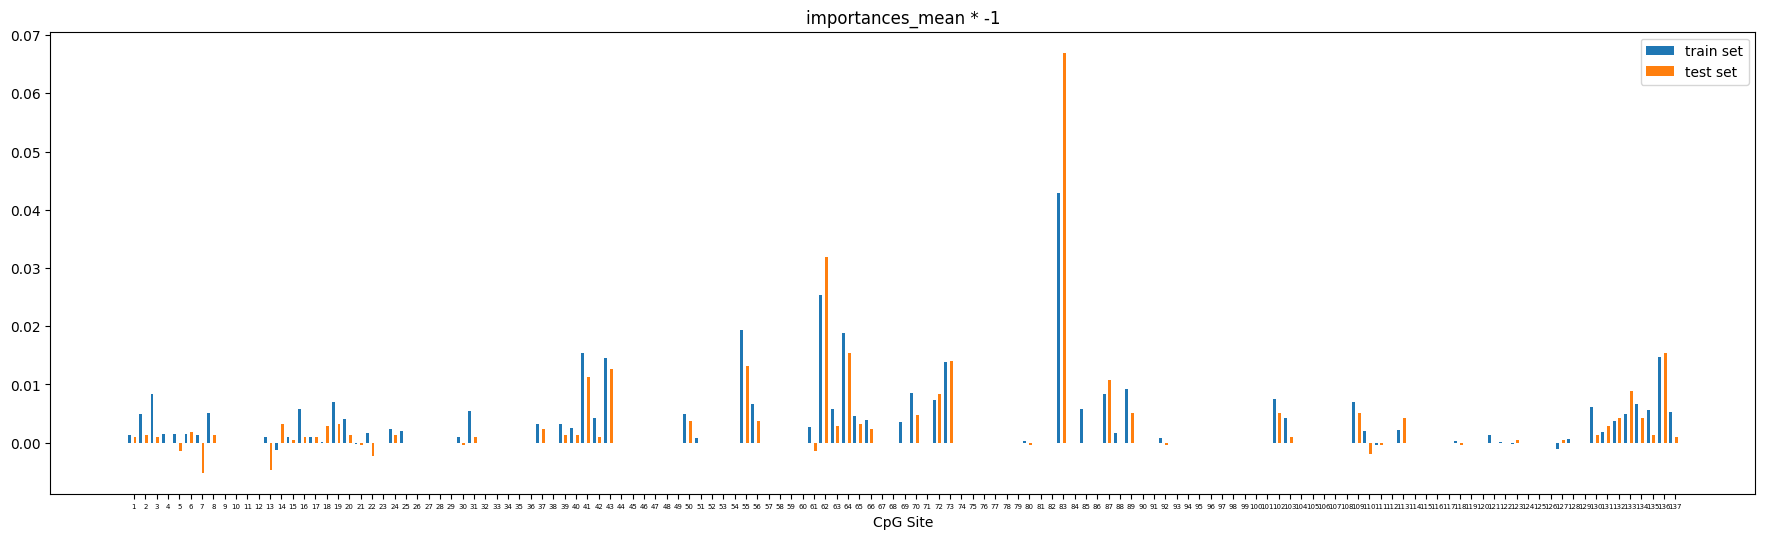

In [ ]:
# plt.figure(figsize=(22, 6))
# plt.bar(X_axis+shifts[0], (-1)*train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
# plt.bar(X_axis+shifts[1], (-1)*test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

# plt.legend()
# plt.title("importances_mean * -1")# Absolute Value of LASSO Coefficient")
# plt.xlabel("CpG Site")
# plt.xticks(X_axis, size=5)
# plt.show()

In [48]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_))

[[ 88  80  37  70 113  83 130 136  64  61  28 132 134  71  42  38  25  84
   81  19 135  97  41 137  43   3 102  77   9 131 123 106  73   4  20  69
  133  17  99  87  72   8  22  89 128   1  31 101  34  56  63  65  10   2
  114  27  24  46  16  55  14  94   6  12  21  33  51  18 125  13  11  60
   15 103 124   5  82  52  54  50  40  29   7  23  26  32  30  53  62  57
   58  59  44  45  47  48  96  95  93  92  90  91  86  85  67  66  68  74
  104 105 100  98 112 111 110 109 108 107 115 116  49  39  35  36  79  78
   75  76 127 126 122 121 117 118 119 120 129]]
[[2.17740932e-01 1.68314658e-01 4.15831421e-01 2.99817429e-01
  7.18557936e-03 1.17469663e-01 0.00000000e+00 2.39755429e-01
  3.98976097e-01 1.72163124e-01 6.05394405e-02 1.06137538e-01
  6.31625948e-02 1.26939213e-01 3.18105671e-02 1.27594631e-01
  2.77879347e-01 6.83025161e-02 4.69527800e-01 2.89541011e-01
  9.92105744e-02 2.35670592e-01 0.00000000e+00 1.42202010e-01
  5.30490639e-01 0.00000000e+00 1.58697597e-01 7.38580386e-01


In [49]:
celltypes

['unedited', 'silenced']

In [58]:
# for i in range(2):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
# plt.legend()
# plt.title("Absolute Value of LASSO Coefficient")
# plt.xlabel("CpG Site")
# plt.xticks(X_axis)
# plt.show()

In [59]:

# train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16)
# train_idx, test_idx

In [60]:
# # To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.inspection import permutation_importance
# from sklearn.model_selection import train_test_split

# # # Assume x and y are your full dataset and labels
# # x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Reshape for scoring
# x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1]))
# x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1]))

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

# # Plotting
# features = [f"Feature {i+1}" for i in range(x_train_reshaped.shape[1])]
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.barh(features, train_results.importances_mean)
# plt.title('Feature Importance on Training Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.subplot(1, 2, 2)
# plt.barh(features, test_results.importances_mean)
# plt.title('Feature Importance on Testing Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.tight_layout()
# plt.show()